In [1]:
import pandas as pd
import numpy as np
from sklearn import metrics
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
#from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....
from IPython.display import Image  
#import pydotplus as pydot
from sklearn import tree
from os import system

In [2]:
df = pd.read_excel('Customer Churn Data.xlsx')

In [3]:
df.head()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device
0,20000,1,4,3.0,6.0,Debit Card,Female,3.0,3,Super,2.0,Single,9,1.0,11,1,5,159.93,Mobile
1,20001,1,0,1.0,8.0,UPI,Male,3.0,4,Regular Plus,3.0,Single,7,1.0,15,0,0,120.9,Mobile
2,20002,1,0,1.0,30.0,Debit Card,Male,2.0,4,Regular Plus,3.0,Single,6,1.0,14,0,3,NaN,Mobile
3,20003,1,0,3.0,15.0,Debit Card,Male,2.0,4,Super,5.0,Single,8,0.0,23,0,3,134.07,Mobile
4,20004,1,0,1.0,12.0,Credit Card,Male,2.0,3,Regular Plus,5.0,Single,3,0.0,11,1,3,129.6,Mobile


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11260 entries, 0 to 11259
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   AccountID                11260 non-null  int64  
 1   Churn                    11260 non-null  int64  
 2   Tenure                   11158 non-null  object 
 3   City_Tier                11148 non-null  float64
 4   CC_Contacted_LY          11158 non-null  float64
 5   Payment                  11151 non-null  object 
 6   Gender                   11152 non-null  object 
 7   Service_Score            11162 non-null  float64
 8   Account_user_count       11148 non-null  object 
 9   account_segment          11163 non-null  object 
 10  CC_Agent_Score           11144 non-null  float64
 11  Marital_Status           11048 non-null  object 
 12  rev_per_month            11158 non-null  object 
 13  Complain_ly              10903 non-null  float64
 14  rev_growth_yoy        

In [6]:
df.shape

(11260, 19)

In [7]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
AccountID,11260.0,NaN,NaN,NaN,25629.5,3250.62635,20000.0,22814.75,25629.5,28444.25,31259.0
Churn,11260.0,NaN,NaN,NaN,0.168384,0.374223,0.0,0.0,0.0,0.0,1.0
Tenure,11158.0,38.0,1.0,1351.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
City_Tier,11148.0,NaN,NaN,NaN,1.653929,0.915015,1.0,1.0,1.0,3.0,3.0
CC_Contacted_LY,11158.0,NaN,NaN,NaN,17.867091,8.853269,4.0,11.0,16.0,23.0,132.0
Payment,11151,5,Debit Card,4587,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,11152,4,Male,6328,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Service_Score,11162.0,NaN,NaN,NaN,2.902526,0.725584,0.0,2.0,3.0,3.0,5.0
Account_user_count,11148.0,7.0,4.0,4569.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
account_segment,11163,7,Super,4062,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
unique_values = df['Tenure'].unique()
print(unique_values)

[4 0 2 13 11 '#' 9 99 19 20 14 8 26 18 5 30 7 1 23 3 29 6 28 24 25 16 10
 15 22 nan 27 12 21 17 50 60 31 51 61]


In [9]:
unique_values = df['rev_growth_yoy'].unique()
print(unique_values)

[11 15 14 23 22 16 12 13 17 18 24 19 20 21 25 26 '$' 4 27 28]


In [10]:
# Assuming df is your DataFrame
df['rev_growth_yoy'] = df['rev_growth_yoy'].replace('$', np.nan)

In [11]:
unique_values = df['coupon_used_for_payment'].unique()
print(unique_values)

[1 0 4 2 9 6 11 7 12 10 5 3 13 15 8 '#' '$' 14 '*' 16]


In [12]:
# Assuming df is your DataFrame
df['coupon_used_for_payment'] = df['coupon_used_for_payment'].replace('#', np.nan)
df['coupon_used_for_payment'] = df['coupon_used_for_payment'].replace('$', np.nan)
df['coupon_used_for_payment'] = df['coupon_used_for_payment'].replace('*', np.nan)

In [13]:
# Assuming df is your DataFrame
df['Tenure'] = df['Tenure'].replace('#', np.nan)

In [14]:
unique_values = df['Payment'].unique()
print(unique_values)

['Debit Card' 'UPI' 'Credit Card' 'Cash on Delivery' 'E wallet' nan]


In [15]:
unique_values = df['Gender'].unique()
print(unique_values)

['Female' 'Male' 'F' nan 'M']


In [16]:
# Assuming df is your DataFrame and you want to replace values in the 'Gender' column
df['Gender'] = df['Gender'].replace({'F': 'Female', 'M': 'Male'})

In [17]:
unique_values = df['Gender'].unique()
print(unique_values)

['Female' 'Male' nan]


In [18]:
unique_values = df['Account_user_count'].unique()
print(unique_values)

[3 4 nan 5 2 '@' 1 6]


In [19]:
# Assuming df is your DataFrame
df['Account_user_count'] = df['Account_user_count'].replace('@', np.nan)

In [20]:
unique_values = df['account_segment'].unique()
print(unique_values)

['Super' 'Regular Plus' 'Regular' 'HNI' 'Regular +' nan 'Super Plus'
 'Super +']


In [21]:
# Assuming df is your DataFrame and you want to replace values in the 'Gender' column
df['account_segment'] = df['account_segment'].replace({'Regular +': 'Regular Plus', 'Super +': 'Super Plus'})

In [22]:
unique_values = df['account_segment'].unique()
print(unique_values)

['Super' 'Regular Plus' 'Regular' 'HNI' nan 'Super Plus']


In [23]:
unique_values = df['Marital_Status'].unique()
print(unique_values)

['Single' 'Divorced' 'Married' nan]


In [24]:
unique_values = df['rev_per_month'].unique()
print(unique_values)

[9 7 6 8 3 2 4 10 1 5 '+' 130 nan 19 139 102 120 138 127 123 124 116 21
 126 134 113 114 108 140 133 129 107 118 11 105 20 119 121 137 110 22 101
 136 125 14 13 12 115 23 122 117 131 104 15 25 135 111 109 100 103]


In [25]:
# Assuming df is your DataFrame
df['rev_per_month'] = df['rev_per_month'].replace('+', np.nan)

In [26]:
unique_values = df['Day_Since_CC_connect'].unique()
print(unique_values)

[5 0 3 7 2 1 8 6 4 15 nan 11 10 9 13 12 17 16 14 30 '$' 46 18 31 47]


In [27]:
# Assuming df is your DataFrame
df['Day_Since_CC_connect'] = df['Day_Since_CC_connect'].replace('$', np.nan)

In [28]:
unique_values = df['cashback'].unique()
print(unique_values)

[159.93 120.9 nan ... 227.36 226.91 191.42]


In [29]:
# Assuming df is your DataFrame
df['cashback'] = df['cashback'].replace('$', np.nan)

In [30]:
unique_values = df['Login_device'].unique()
print(unique_values)

['Mobile' 'Computer' '&&&&' nan]


In [31]:
# Assuming df is your DataFrame
df['Login_device'] = df['Login_device'].replace('&&&&', np.nan)

In [32]:
df.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
AccountID,11260.0,NaN,NaN,NaN,25629.5,3250.62635,20000.0,22814.75,25629.5,28444.25,31259.0
Churn,11260.0,NaN,NaN,NaN,0.168384,0.374223,0.0,0.0,0.0,0.0,1.0
Tenure,11042.0,NaN,NaN,NaN,11.025086,12.879782,0.0,2.0,9.0,16.0,99.0
City_Tier,11148.0,NaN,NaN,NaN,1.653929,0.915015,1.0,1.0,1.0,3.0,3.0
CC_Contacted_LY,11158.0,NaN,NaN,NaN,17.867091,8.853269,4.0,11.0,16.0,23.0,132.0
Payment,11151,5,Debit Card,4587,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Gender,11152,2,Male,6704,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Service_Score,11162.0,NaN,NaN,NaN,2.902526,0.725584,0.0,2.0,3.0,3.0,5.0
Account_user_count,10816.0,NaN,NaN,NaN,3.692862,1.022976,1.0,3.0,4.0,4.0,6.0
account_segment,11163,5,Regular Plus,4124,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [33]:
df.isnull().sum()

AccountID                    0
Churn                        0
Tenure                     218
City_Tier                  112
CC_Contacted_LY            102
Payment                    109
Gender                     108
Service_Score               98
Account_user_count         444
account_segment             97
CC_Agent_Score             116
Marital_Status             212
rev_per_month              791
Complain_ly                357
rev_growth_yoy               3
coupon_used_for_payment      3
Day_Since_CC_connect       358
cashback                   473
Login_device               760
dtype: int64

In [34]:
df['Payment'].fillna('Debit Card', inplace=True)

In [35]:
df['Gender'].fillna('Male', inplace=True)

In [36]:
df['account_segment'].fillna('Regular Plus', inplace=True)

In [37]:
df['Marital_Status'].fillna('Married', inplace=True)

In [38]:
df['Login_device'].fillna('Mobile', inplace=True)

In [39]:
median_tenure = df['Tenure'].median()
df['Tenure'].fillna(median_tenure, inplace=True)

In [40]:
df['City_Tier'].fillna(df['City_Tier'].max(), inplace=True)

In [41]:
df['coupon_used_for_payment'].fillna(df['coupon_used_for_payment'].median(), inplace=True)

In [42]:
df['CC_Contacted_LY'].fillna(df['CC_Contacted_LY'].median(), inplace=True)

In [43]:
df['rev_growth_yoy'].fillna(df['rev_growth_yoy'].median(), inplace=True)

In [44]:
df['Service_Score'].fillna(df['Service_Score'].median(), inplace=True)

In [45]:
df['Account_user_count'].fillna(df['Account_user_count'].median(), inplace=True)

In [46]:
df['CC_Agent_Score'].fillna(df['CC_Agent_Score'].median(), inplace=True)

In [47]:
df['rev_per_month'].fillna(df['rev_per_month'].median(), inplace=True)

In [48]:
df['Complain_ly'].fillna(df['Complain_ly'].median(), inplace=True)

In [49]:
df['Day_Since_CC_connect'].fillna(df['Day_Since_CC_connect'].median(), inplace=True)

In [50]:
df['cashback'].fillna(df['cashback'].median(), inplace=True)

In [51]:
df.isnull().sum()

AccountID                  0
Churn                      0
Tenure                     0
City_Tier                  0
CC_Contacted_LY            0
Payment                    0
Gender                     0
Service_Score              0
Account_user_count         0
account_segment            0
CC_Agent_Score             0
Marital_Status             0
rev_per_month              0
Complain_ly                0
rev_growth_yoy             0
coupon_used_for_payment    0
Day_Since_CC_connect       0
cashback                   0
Login_device               0
dtype: int64

In [52]:
# Change the data type of 'Tenure' from int64 to object
df['Tenure'] = df['Tenure'].astype(float)

# Change the data type of 'City_Tier' from float64 to object
df['City_Tier'] = df['City_Tier'].astype(str)

# Change the data type of 'rev_per_month' from object to int64
df['rev_per_month'] = df['rev_per_month'].astype(int)

# Change the data type of 'rev_growth_yoy' from object to int64
df['rev_growth_yoy'] = df['rev_growth_yoy'].astype(int)

# Change the data type of 'coupon_used_for_payment' from object to int64
df['coupon_used_for_payment'] = df['coupon_used_for_payment'].astype(int)

# Change the data type of 'Day_Since_CC_connect' from object to int64
df['Day_Since_CC_connect'] = df['Day_Since_CC_connect'].astype(int)

# Change the data type of 'cashback' from object to int64
df['cashback'] = df['cashback'].astype(int)

# Now, 'df' contains the specified columns with the desired data types.


In [53]:
duplicates = df[df.duplicated()]
duplicates

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device


In [56]:
from pylab import rcParams
rcParams['figure.figsize'] = 18,14
rcParams['font.size'] = 12
rcParams['text.color'] = 'green'

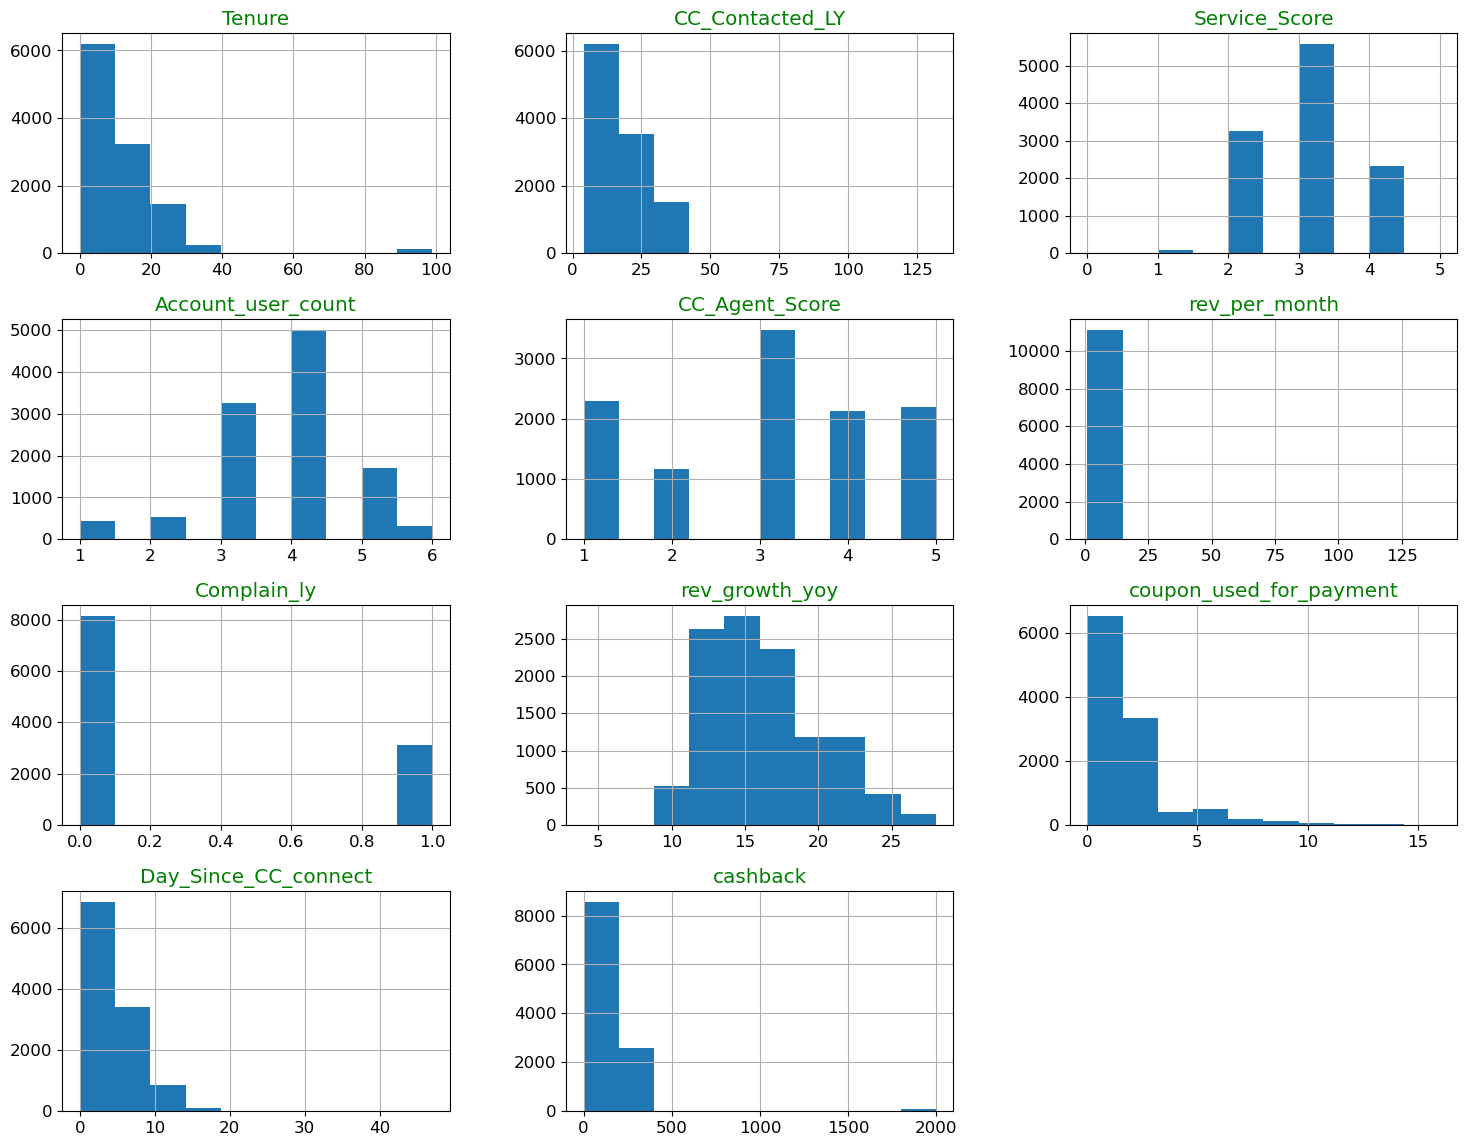

In [57]:
df[['Tenure', 'City_Tier','CC_Contacted_LY' , 'Service_Score', 'Account_user_count', 'CC_Agent_Score','rev_per_month','Complain_ly','rev_growth_yoy','coupon_used_for_payment','Day_Since_CC_connect','cashback']].hist();  

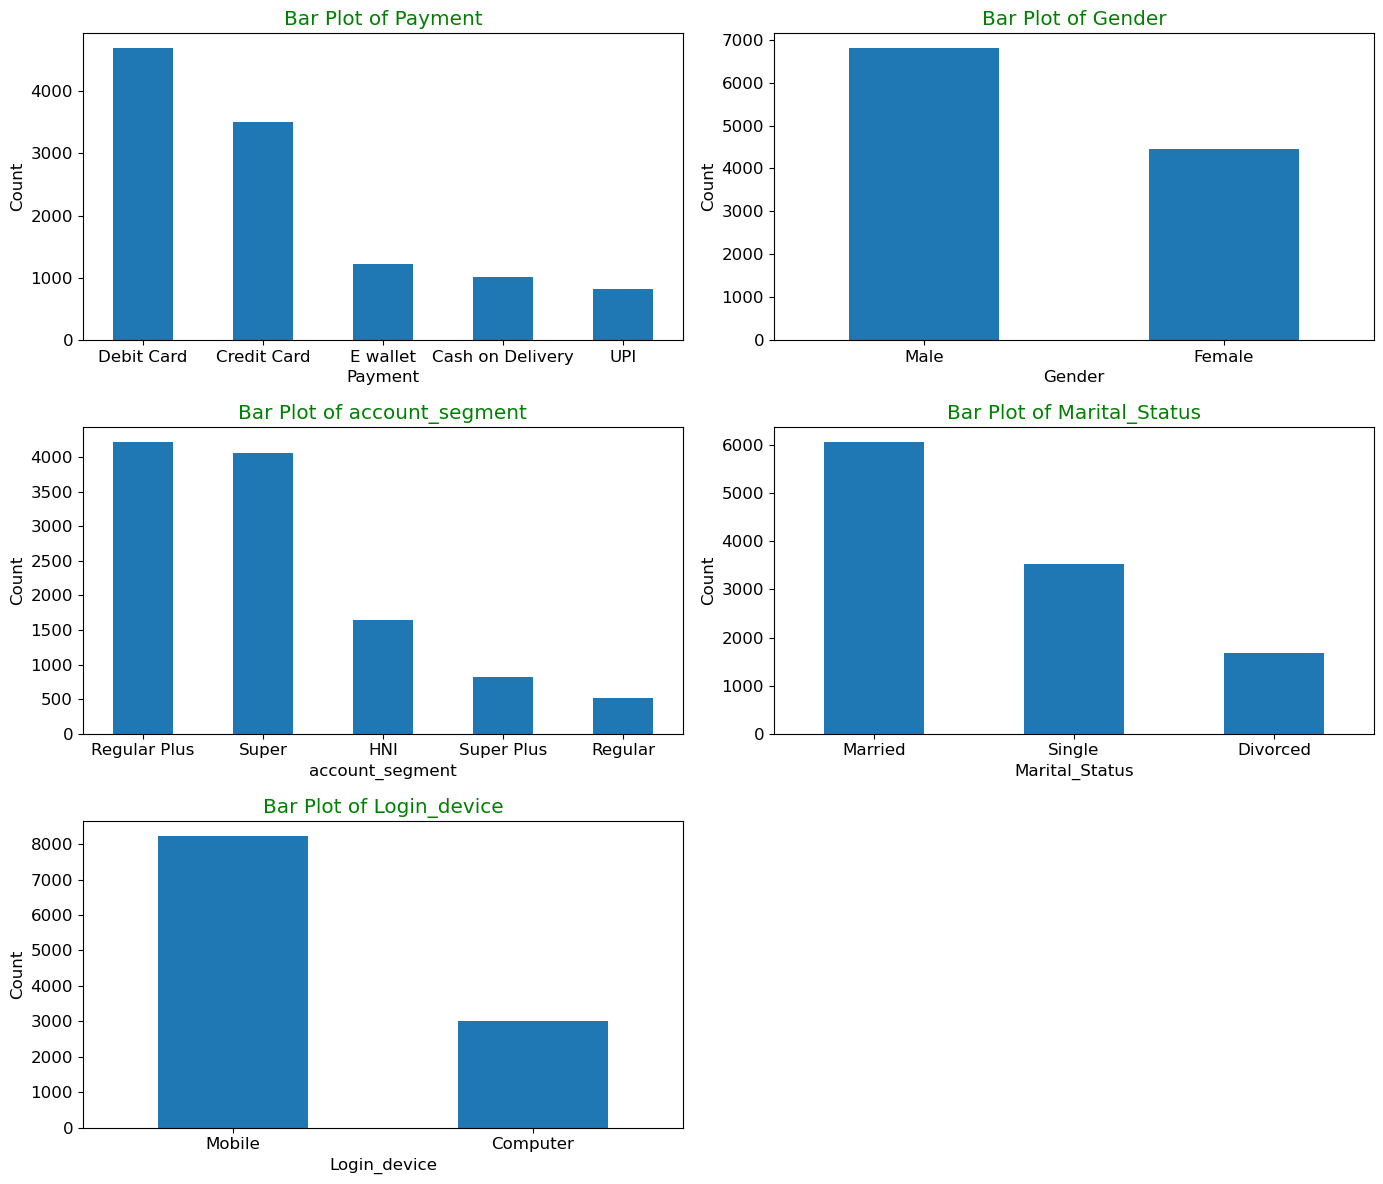

In [58]:
# Specify the categorical columns you want to plot
categorical_columns = ['Payment', 'Gender', 'account_segment', 'Marital_Status', 'Login_device']

# Calculate the number of plots needed
num_plots = len(categorical_columns)

# Calculate the number of rows and columns for subplots
num_rows = (num_plots + 1) // 2  # Ensure at least one row
num_cols = 2

# Create a figure with subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(14, 4 * num_rows))

# Flatten the axes array to iterate through subplots
axes = axes.flatten()

# Loop through the categorical columns and create bar plots
for i, col in enumerate(categorical_columns):
    df[col].value_counts().plot(kind='bar', ax=axes[i], rot=0)
    axes[i].set_title(f'Bar Plot of {col}')
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('Count')

# Hide any unused subplots
for j in range(num_plots, num_rows * num_cols):
    fig.delaxes(axes[j])

# Adjust spacing between subplots
plt.tight_layout()

# Show the combined figure
plt.show()


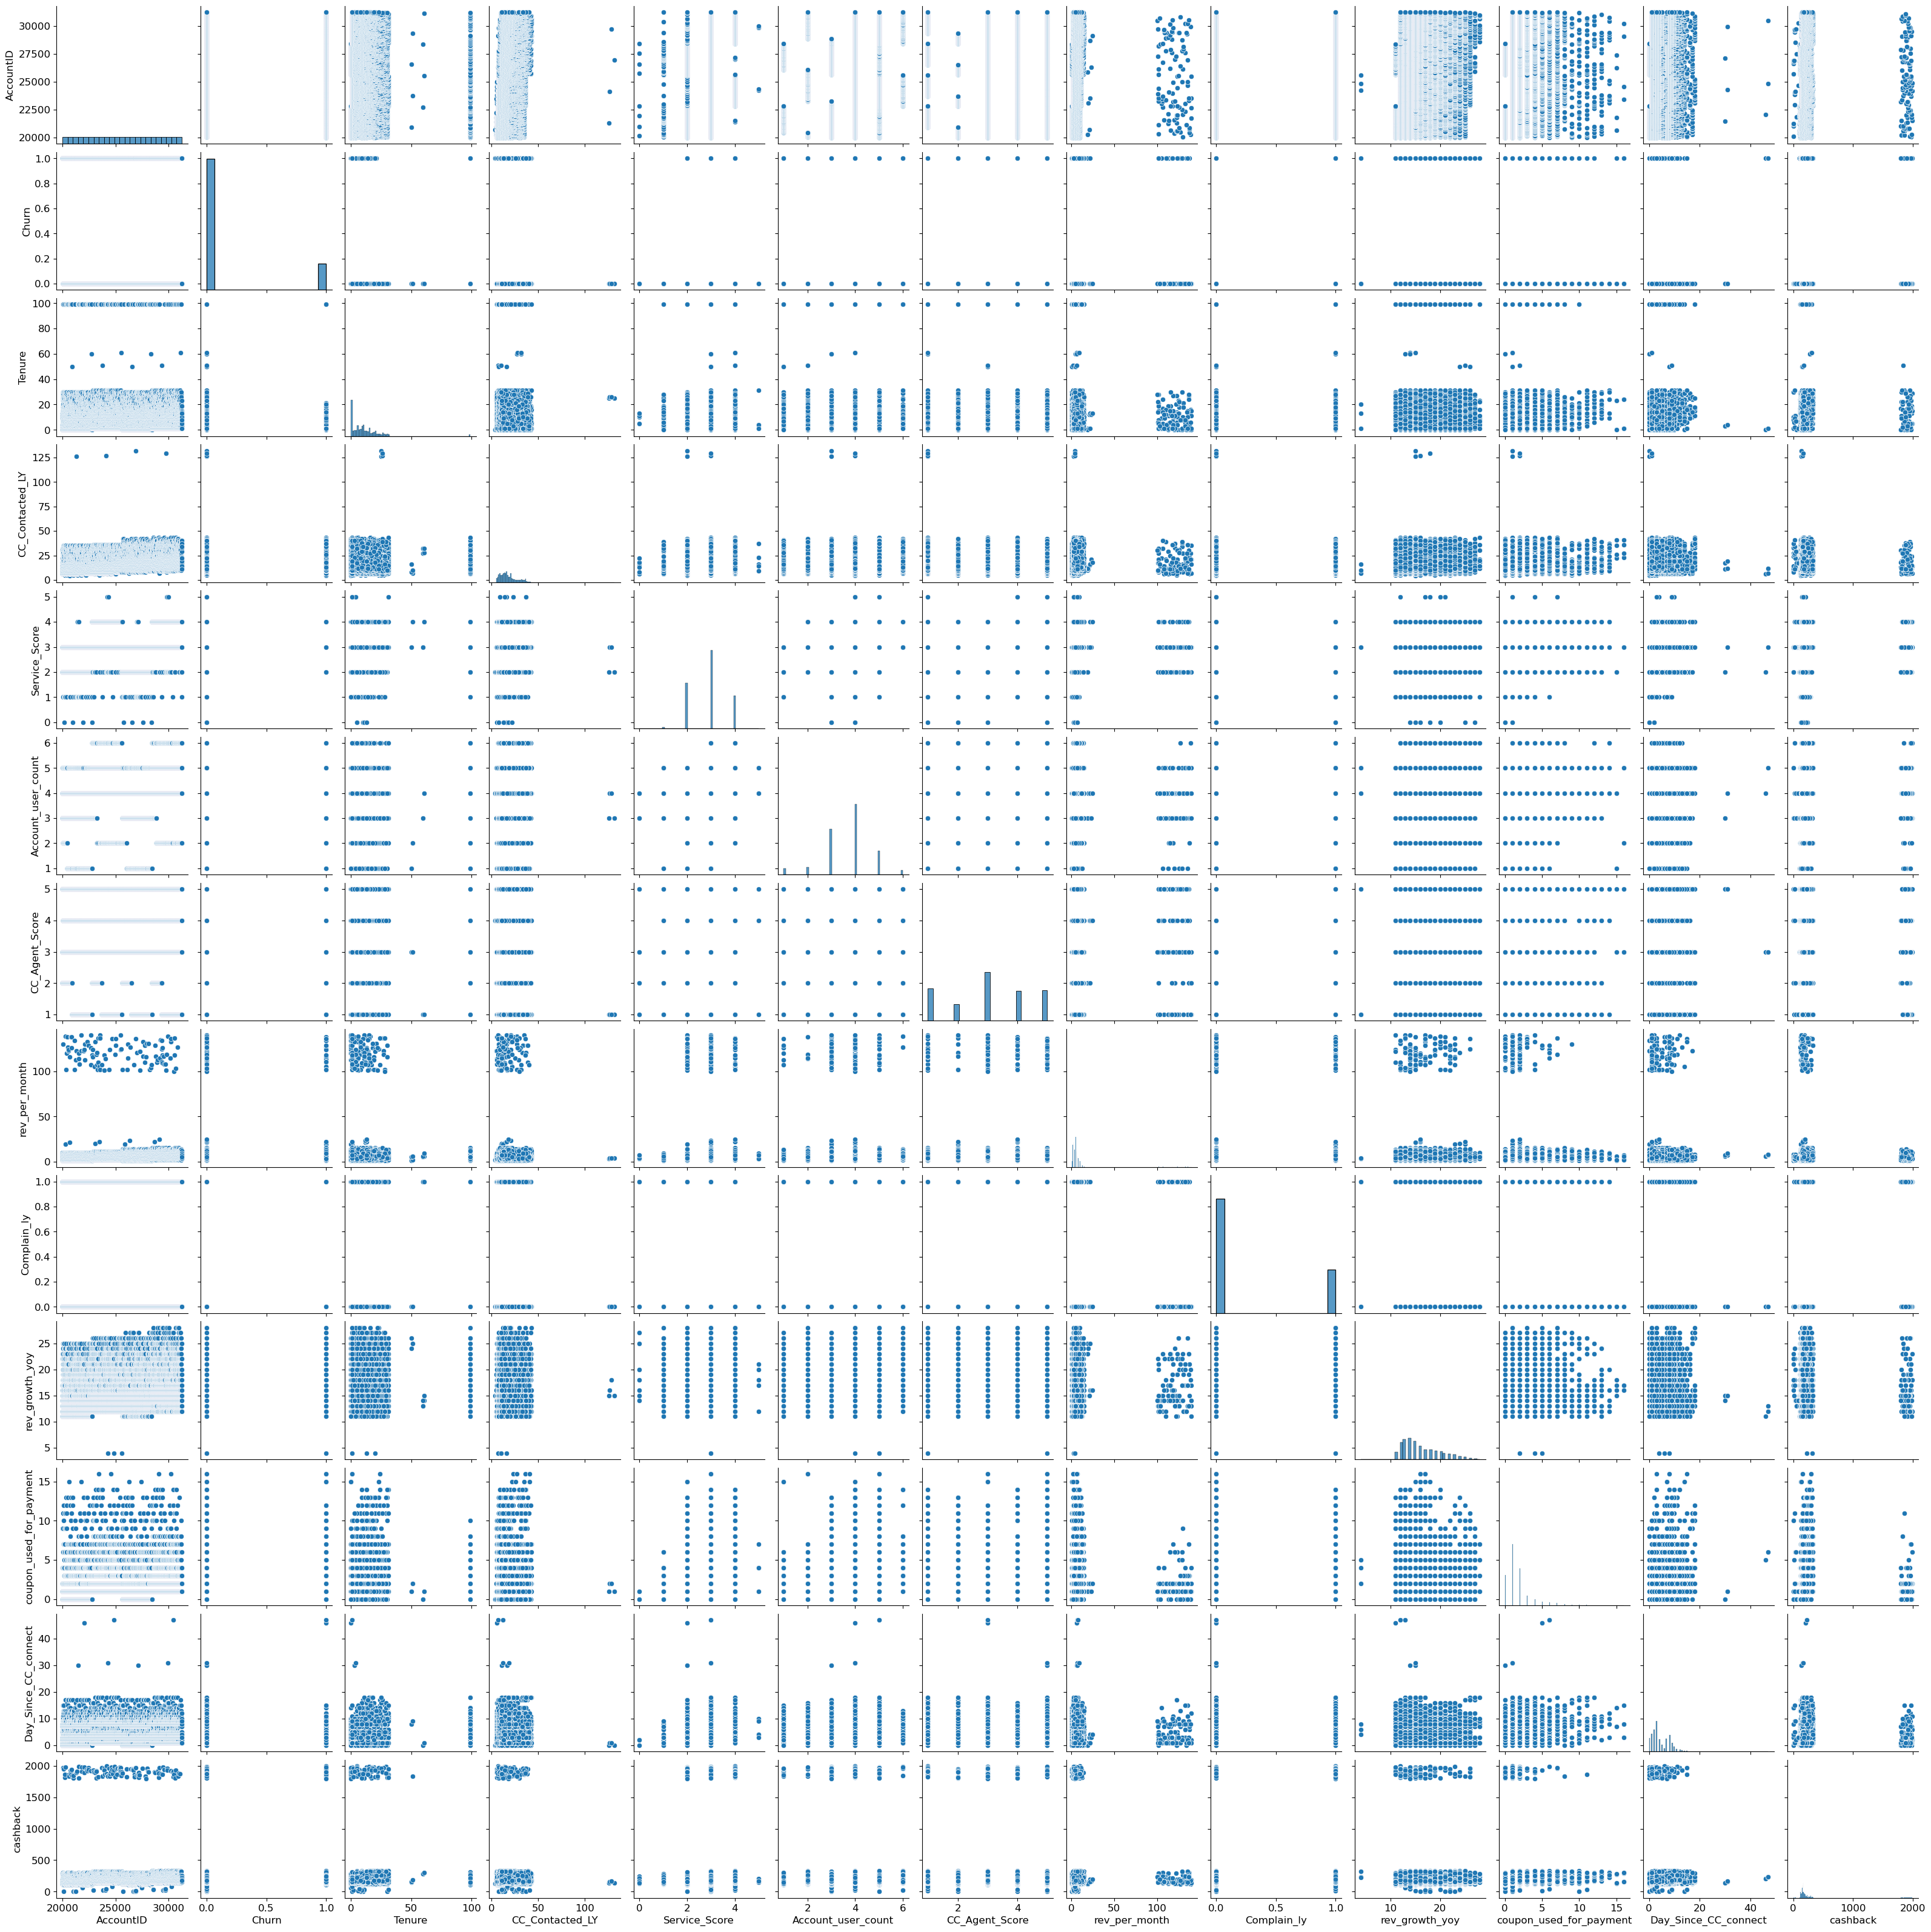

In [59]:
sns.pairplot(df);

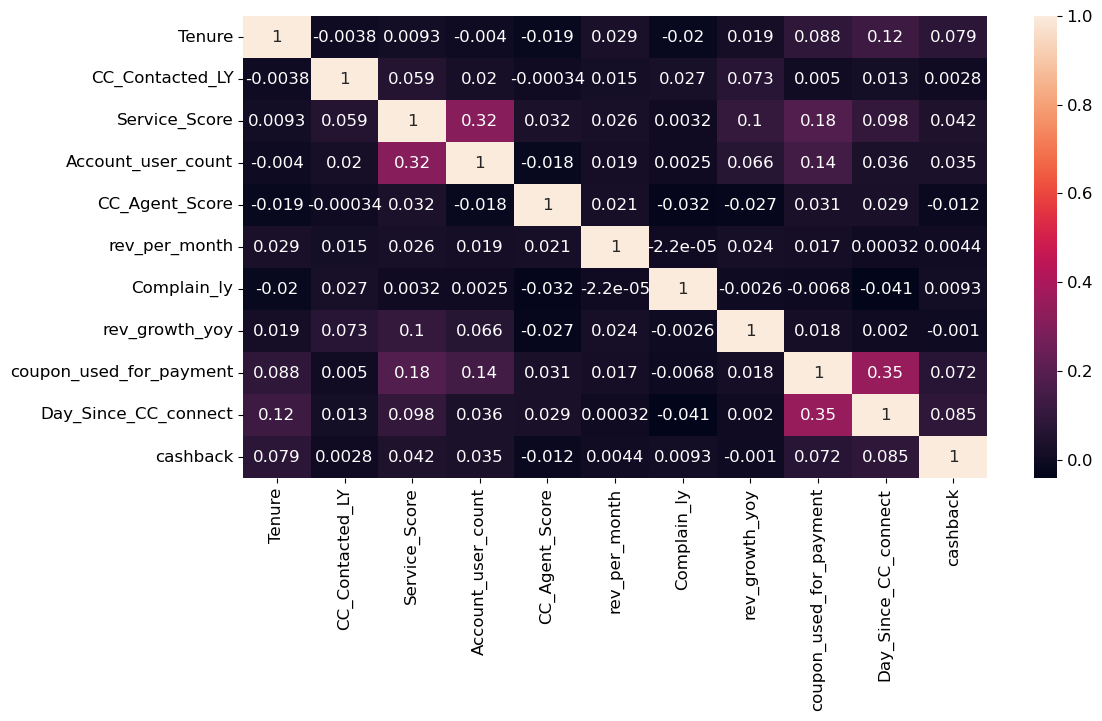

In [60]:
# Calculate the correlation matrix of the selected columns
fig = plt.figure(figsize=(12, 6))
corr_matrix = df[['Tenure', 'City_Tier','CC_Contacted_LY' , 'Service_Score', 'Account_user_count', 'CC_Agent_Score','rev_per_month','Complain_ly','rev_growth_yoy','coupon_used_for_payment','Day_Since_CC_connect','cashback']].corr()

# Create a heatmap of the correlation matrix
sns.heatmap(corr_matrix, annot=True)

# Show the plot
plt.show()

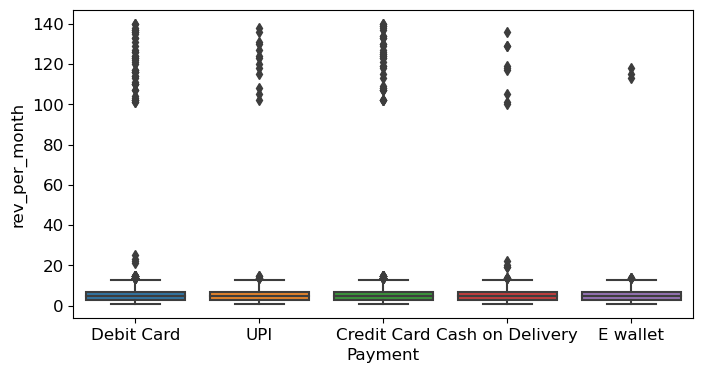

In [61]:
rcParams['figure.figsize'] = 8, 4
sns.boxplot(x=df['Payment'], y=df['rev_per_month']);

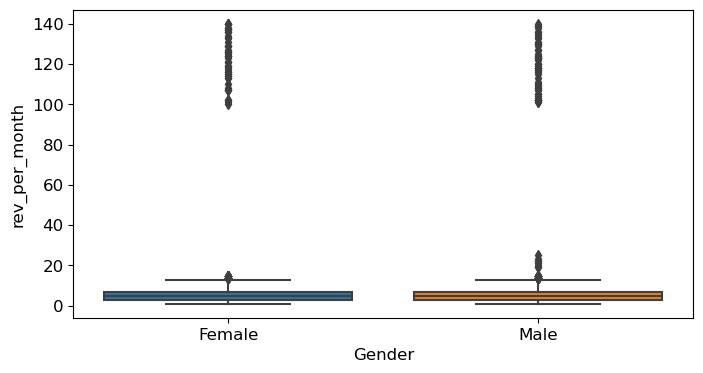

In [62]:
rcParams['figure.figsize'] = 8, 4
sns.boxplot(x=df['Gender'], y=df['rev_per_month']);

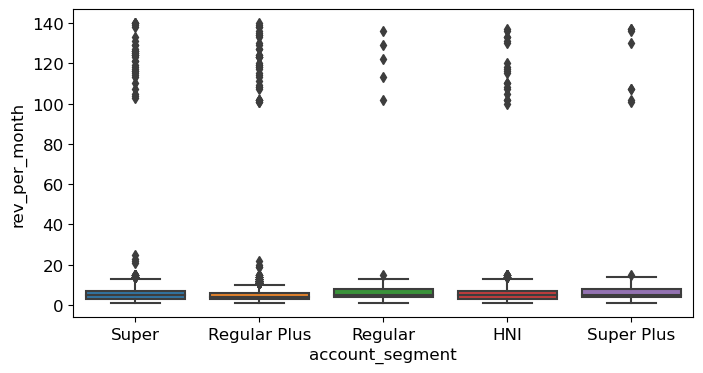

In [63]:
rcParams['figure.figsize'] = 8, 4
sns.boxplot(x=df['account_segment'], y=df['rev_per_month']);

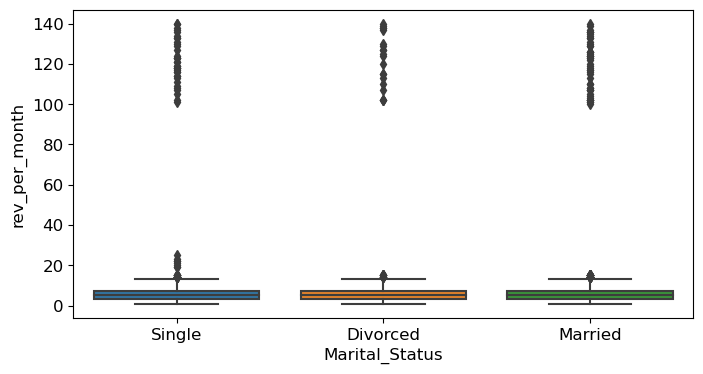

In [64]:
rcParams['figure.figsize'] = 8, 4
sns.boxplot(x=df['Marital_Status'], y=df['rev_per_month']);

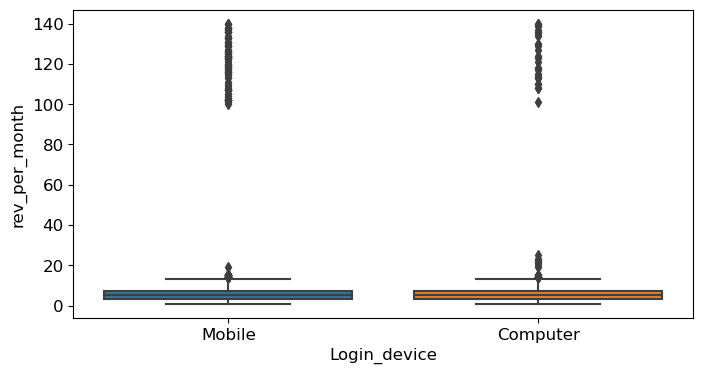

In [65]:
rcParams['figure.figsize'] = 8, 4
sns.boxplot(x=df['Login_device'], y=df['rev_per_month']);

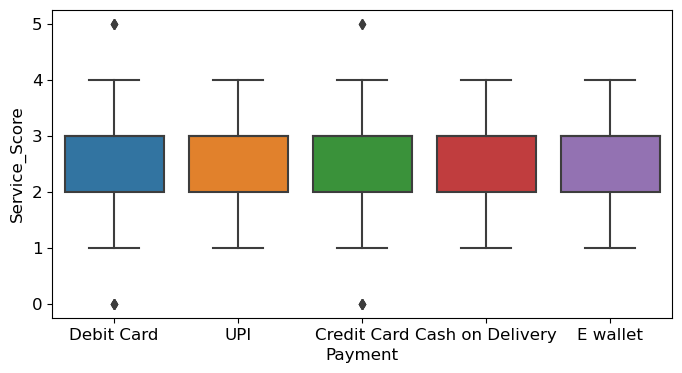

In [66]:
rcParams['figure.figsize'] = 8, 4
sns.boxplot(x=df['Payment'], y=df['Service_Score']);

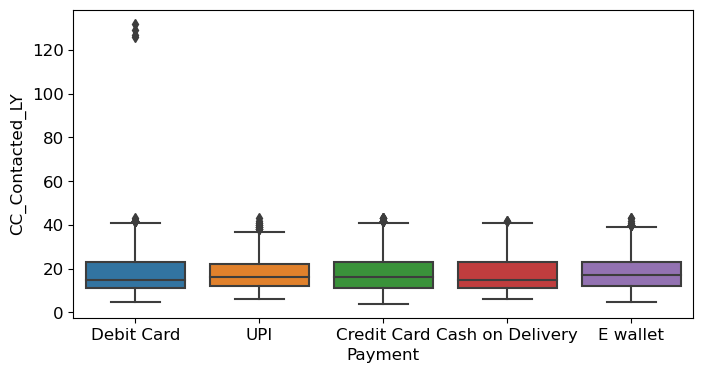

In [67]:
rcParams['figure.figsize'] = 8, 4
sns.boxplot(x=df['Payment'], y=df['CC_Contacted_LY']);

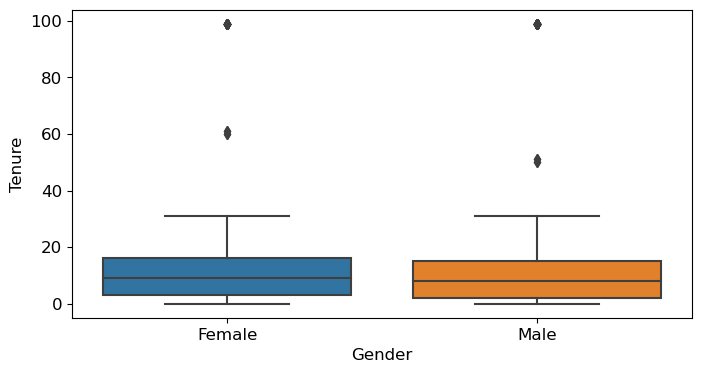

In [68]:
rcParams['figure.figsize'] = 8, 4
sns.boxplot(x=df['Gender'], y=df['Tenure']);

In [69]:
# Create a cross-tabulation
cross_tab = pd.crosstab(df['Gender'], df['Tenure'])

print(cross_tab)

Tenure  0.0   1.0   2.0   3.0   4.0   5.0   6.0   7.0   8.0   9.0   ...  27.0  \
Gender                                                              ...         
Female   454   484   116   155   171   169   146   172   200   290  ...    86   
Male     777   867   238   255   232   234   217   278   319   424  ...    45   

Tenure  28.0  29.0  30.0  31.0  50.0  51.0  60.0  61.0  99.0  
Gender                                                        
Female    69    36    62    36     0     0     2     2    50  
Male      68    78    75    60     2     2     0     0    81  

[2 rows x 37 columns]


<AxesSubplot:xlabel='Tenure', ylabel='count'>

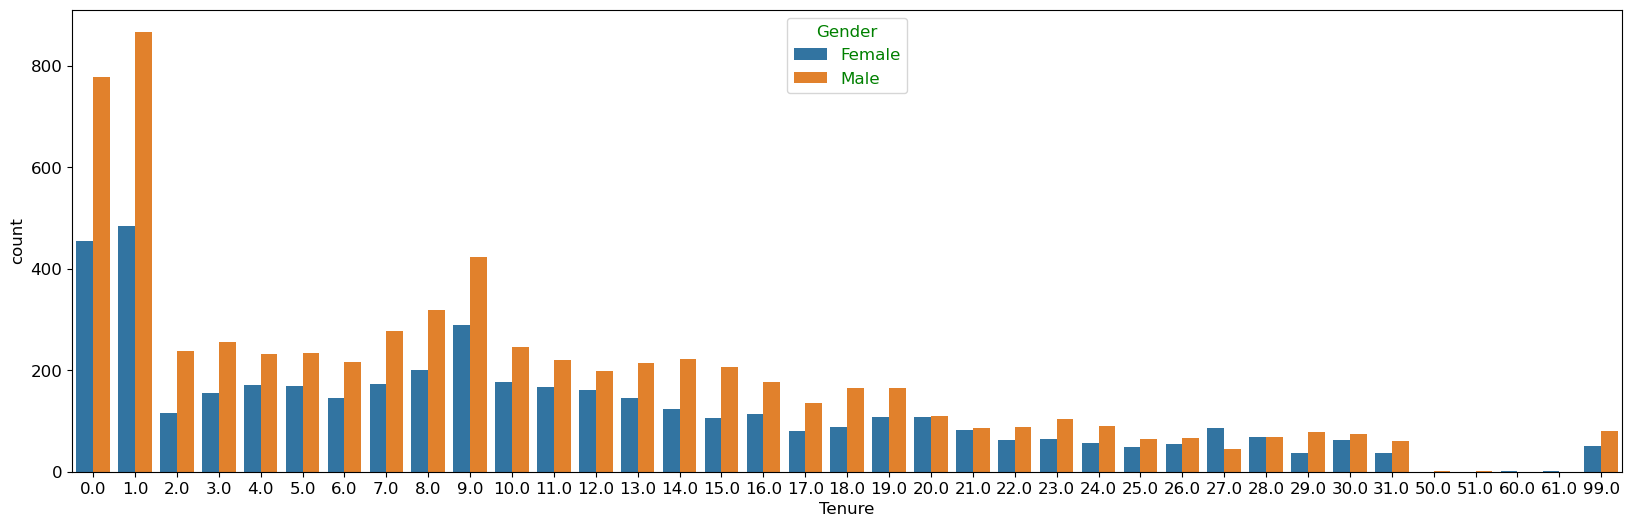

In [70]:
rcParams['figure.figsize'] = 20, 6
sns.countplot(x='Tenure', hue='Gender', data=df)

<AxesSubplot:xlabel='Tenure', ylabel='count'>

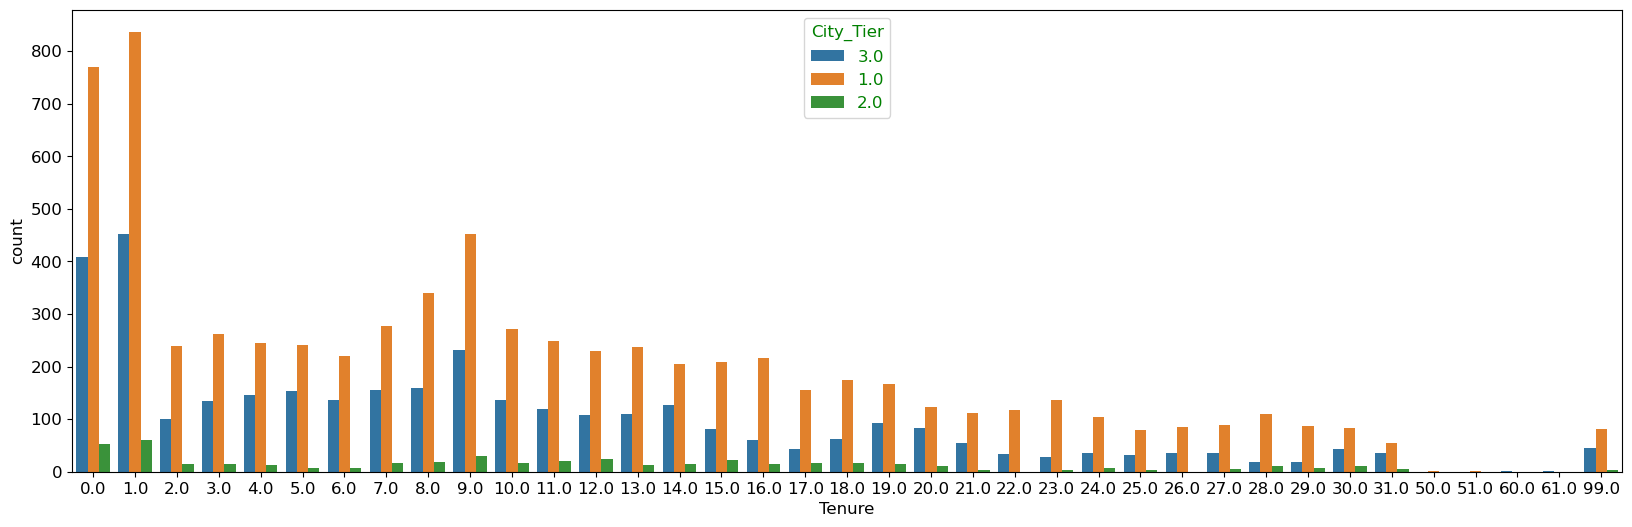

In [71]:
rcParams['figure.figsize'] = 20, 6
sns.countplot(x='Tenure', hue='City_Tier', data=df)

<AxesSubplot:xlabel='Payment', ylabel='count'>

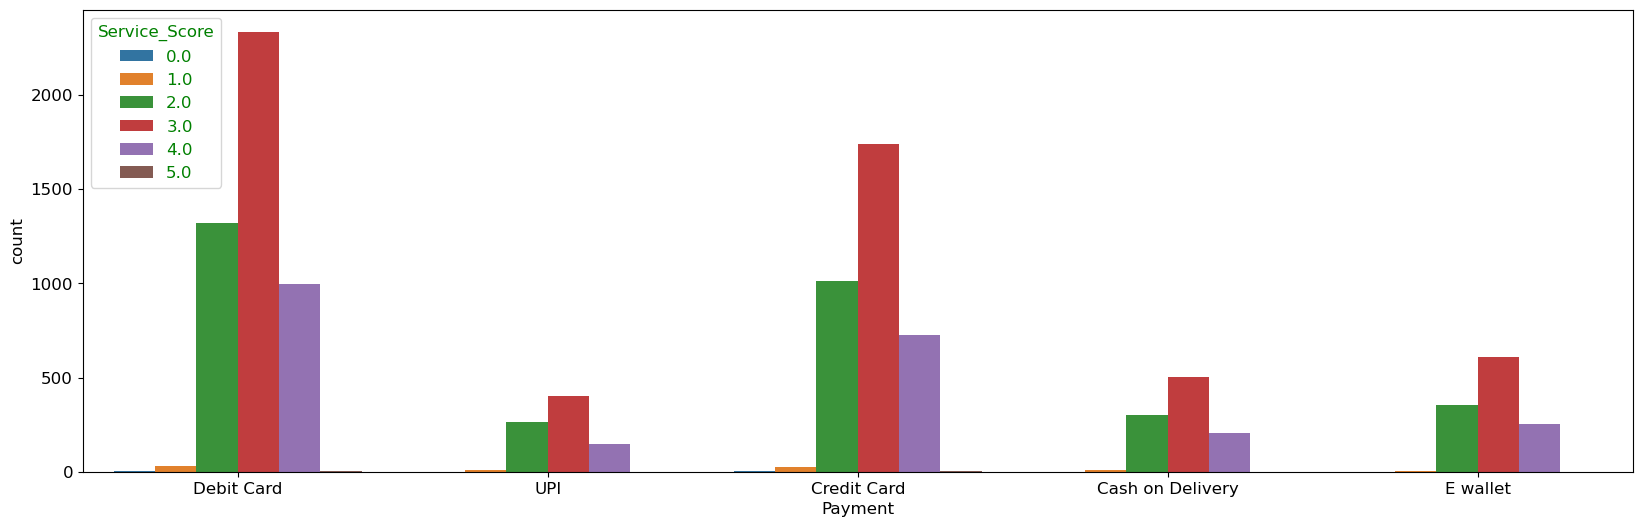

In [72]:
rcParams['figure.figsize'] = 20, 6
sns.countplot(x='Payment', hue='Service_Score', data=df)

<AxesSubplot:xlabel='City_Tier', ylabel='count'>

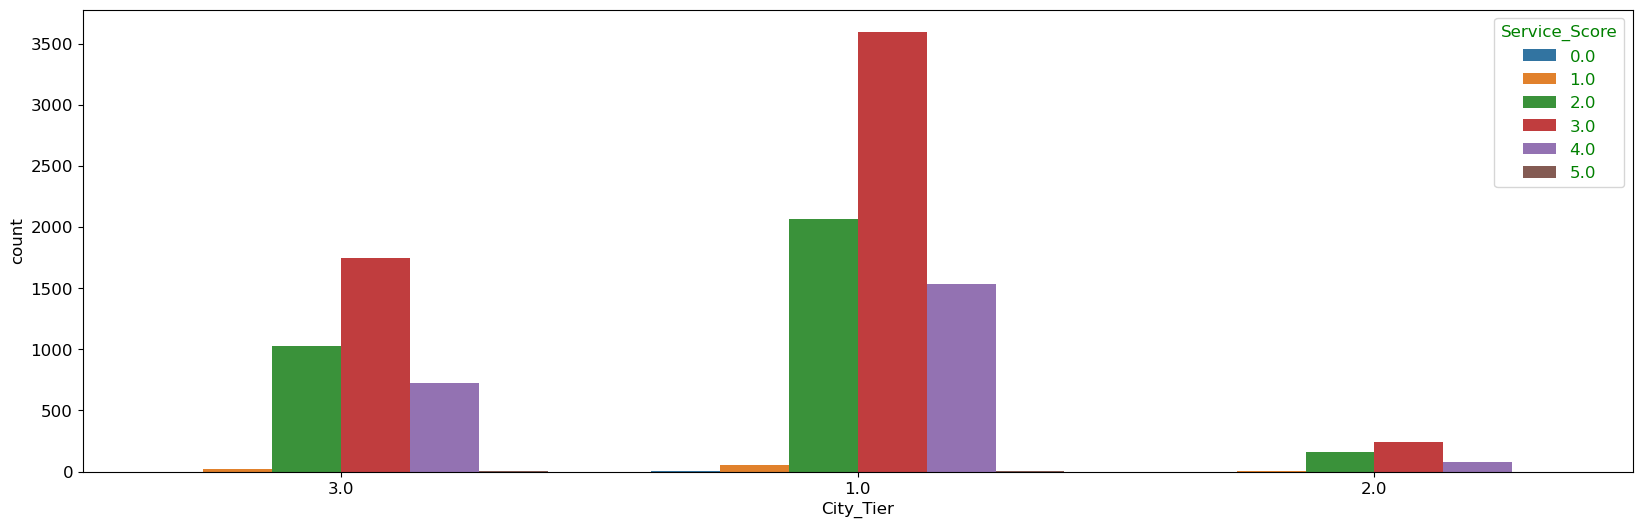

In [73]:
rcParams['figure.figsize'] = 20, 6
sns.countplot(x='City_Tier', hue='Service_Score', data=df)

<AxesSubplot:xlabel='Payment', ylabel='count'>

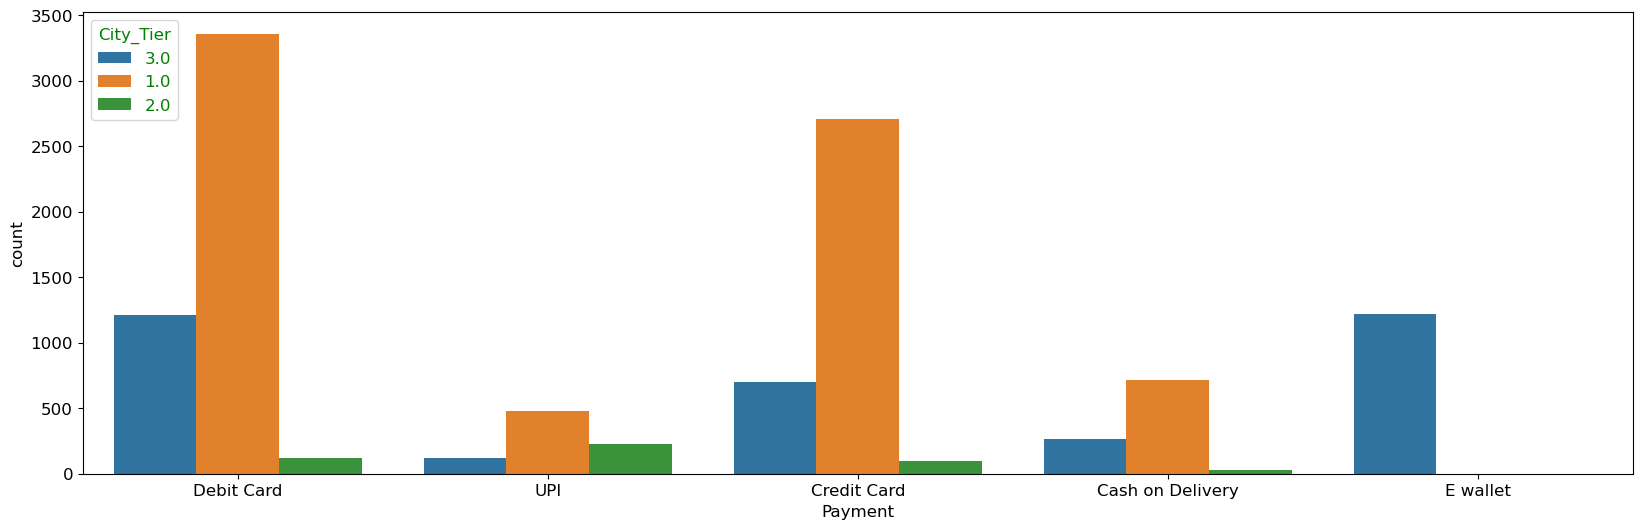

In [74]:
rcParams['figure.figsize'] = 20, 6
sns.countplot(x='Payment', hue='City_Tier', data=df)

<AxesSubplot:xlabel='Account_user_count', ylabel='count'>

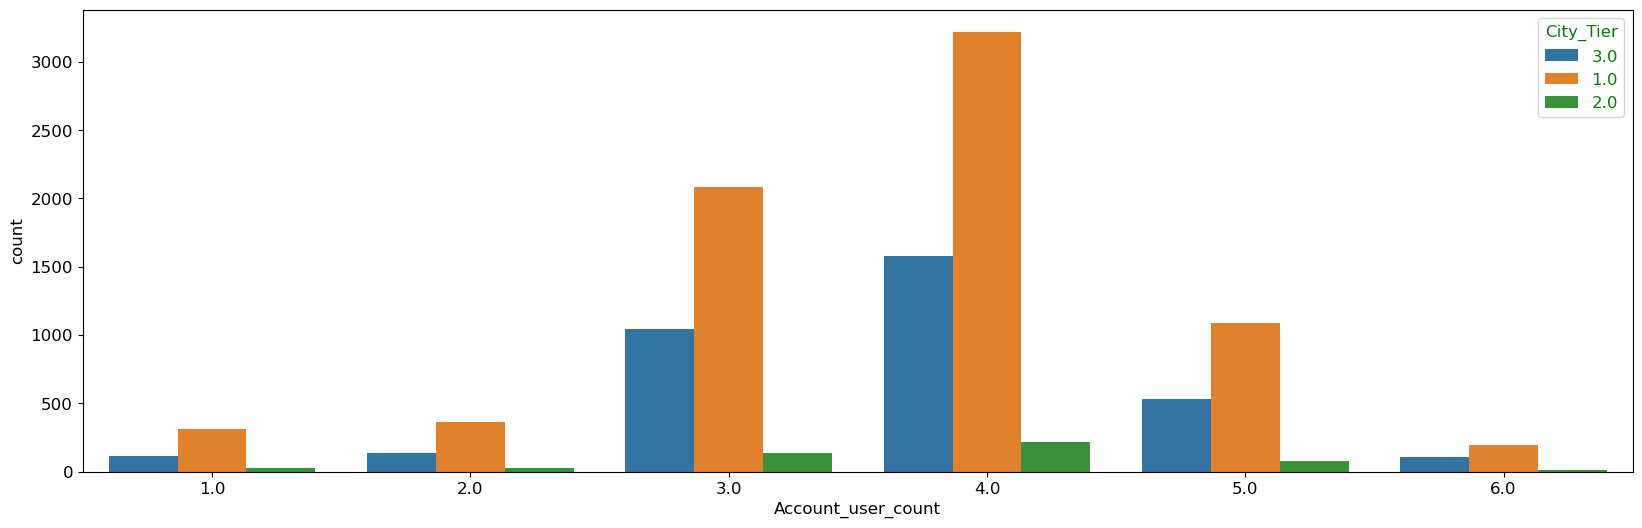

In [75]:
rcParams['figure.figsize'] = 20, 6
sns.countplot(x='Account_user_count', hue='City_Tier', data=df)

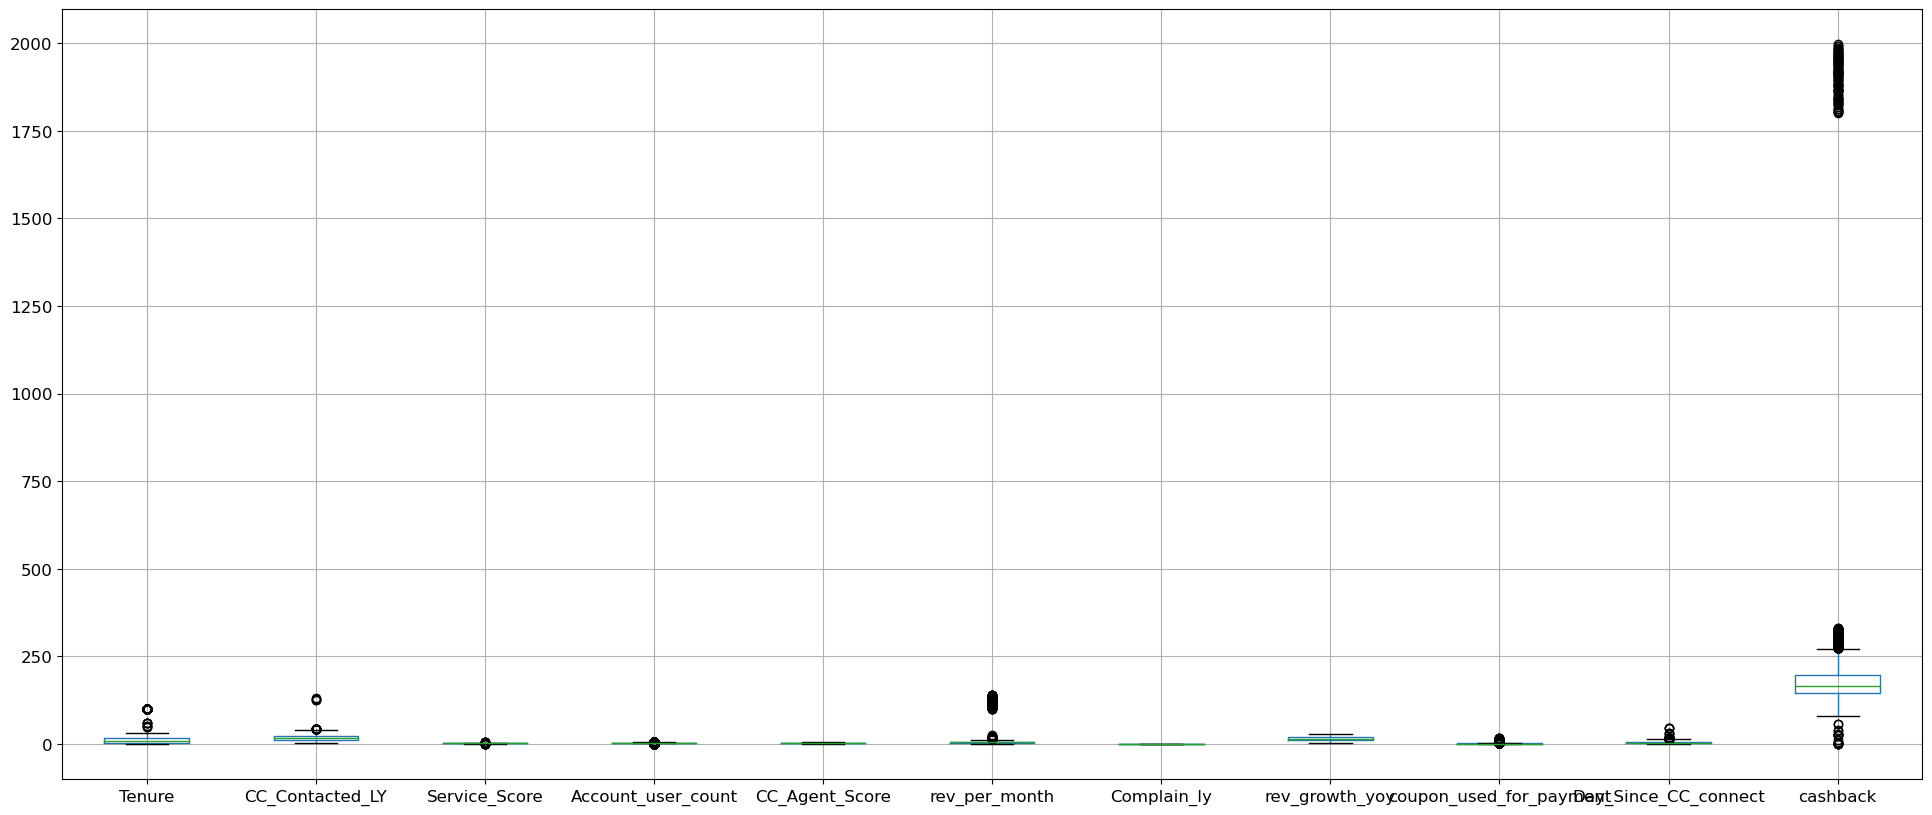

In [76]:
rcParams['figure.figsize'] = 24,10
rcParams['font.size'] = 12
rcParams['text.color'] = 'green'
cols=['Tenure','CC_Contacted_LY' , 'Service_Score', 'Account_user_count', 'CC_Agent_Score','rev_per_month','Complain_ly','rev_growth_yoy','coupon_used_for_payment','Day_Since_CC_connect','cashback'];
df[cols].boxplot();

In [77]:
def remove_outlier(col):
    sorted(col)
    Q1,Q3=np.percentile(col,[25,75])
    IQR=Q3-Q1
    lower_range= Q1-(1.5 * IQR)
    upper_range= Q3+(1.5 * IQR)
    return lower_range, upper_range

In [78]:
for column in df[cols].columns:
    lr,ur=remove_outlier(df[column])
    df[column]=np.where(df[column]>ur,ur,df[column])
    df[column]=np.where(df[column]<lr,lr,df[column])

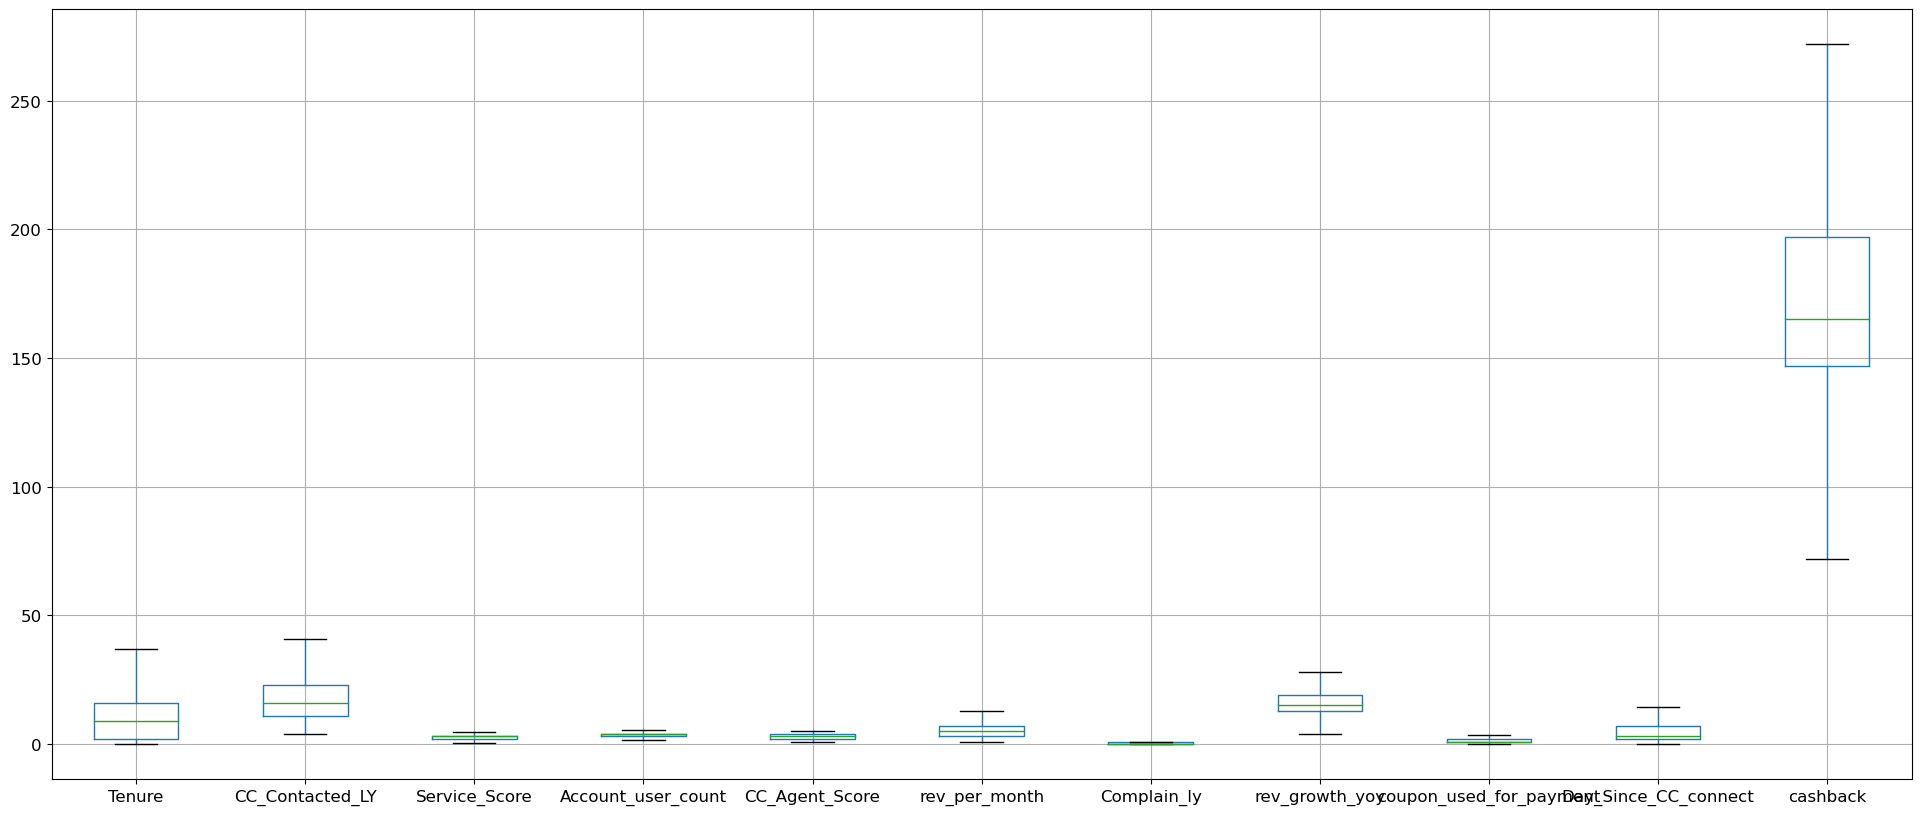

In [79]:
rcParams['figure.figsize'] = 24,10
rcParams['font.size'] = 12
rcParams['text.color'] = 'green'
cols=['Tenure','CC_Contacted_LY' , 'Service_Score', 'Account_user_count', 'CC_Agent_Score','rev_per_month','Complain_ly','rev_growth_yoy','coupon_used_for_payment','Day_Since_CC_connect','cashback'];
df[cols].boxplot();

In [80]:
class_counts = df['Churn'].value_counts()
print(class_counts)

0    9364
1    1896
Name: Churn, dtype: int64


In [81]:
from scipy.stats import zscore
df_new_scaled = df[cols].apply(zscore)

In [82]:
from scipy.cluster.hierarchy import dendrogram, linkage
wardlink = linkage(df_new_scaled, method = 'ward')

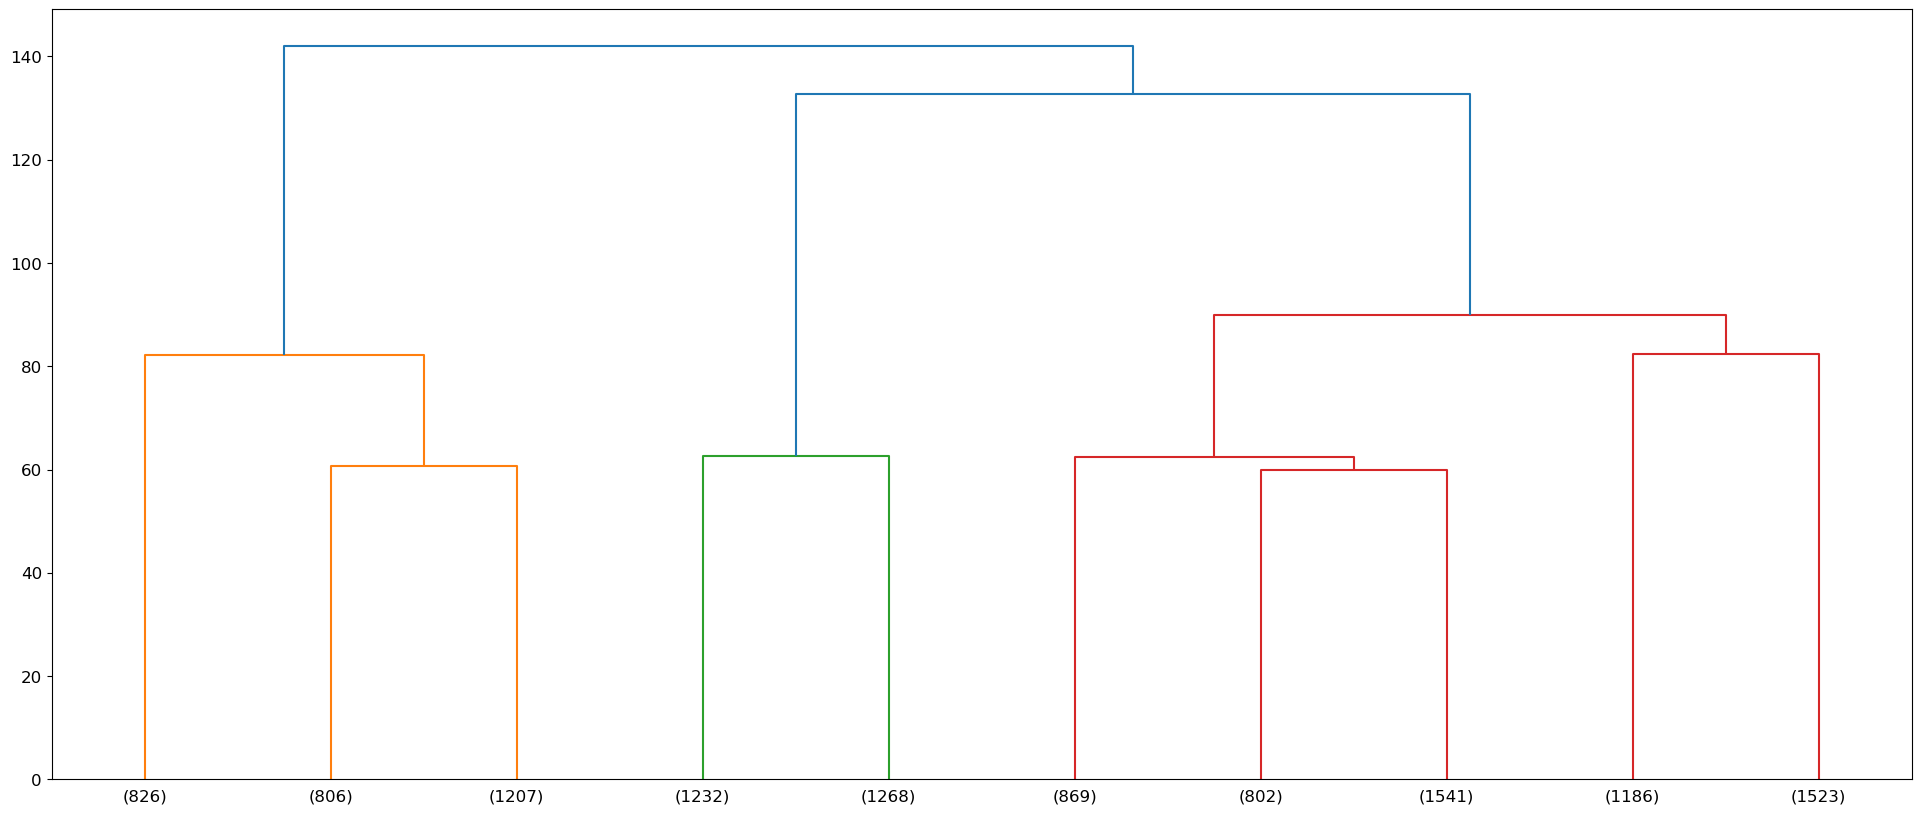

In [83]:
dend = dendrogram(wardlink,
                 truncate_mode='lastp',
                 p = 10,
                 )

In [84]:
from scipy.cluster.hierarchy import fcluster

In [85]:
clusters = fcluster(wardlink, 4, criterion='maxclust')
clusters

array([2, 2, 2, ..., 2, 1, 3], dtype=int32)

In [86]:
clusters = fcluster(wardlink, 85, criterion='distance')
clusters

array([2, 2, 2, ..., 2, 1, 3], dtype=int32)

In [87]:
df['clusters'] = clusters

In [88]:
df.head()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Payment,Gender,Service_Score,Account_user_count,account_segment,CC_Agent_Score,Marital_Status,rev_per_month,Complain_ly,rev_growth_yoy,coupon_used_for_payment,Day_Since_CC_connect,cashback,Login_device,clusters
0,20000,1,4.0,3.0,6.0,Debit Card,Female,3.0,3.0,Super,2.0,Single,9.0,1.0,11.0,1.0,5.0,159.0,Mobile,2
1,20001,1,0.0,1.0,8.0,UPI,Male,3.0,4.0,Regular Plus,3.0,Single,7.0,1.0,15.0,0.0,0.0,120.0,Mobile,2
2,20002,1,0.0,1.0,30.0,Debit Card,Male,2.0,4.0,Regular Plus,3.0,Single,6.0,1.0,14.0,0.0,3.0,165.0,Mobile,2
3,20003,1,0.0,3.0,15.0,Debit Card,Male,2.0,4.0,Super,5.0,Single,8.0,0.0,23.0,0.0,3.0,134.0,Mobile,3
4,20004,1,0.0,1.0,12.0,Credit Card,Male,2.0,3.0,Regular Plus,5.0,Single,3.0,0.0,11.0,1.0,3.0,129.0,Mobile,3


In [89]:
pip install imbalanced-learn

Note: you may need to restart the kernel to use updated packages.


In [90]:
df = pd.get_dummies(df, columns=['Gender', 'Payment', 'Marital_Status', 'account_segment', 'Login_device'], prefix=['Gender', 'Payment', 'Marital_Status', 'account_segment', 'Login_device'])


In [91]:
df.head()

,AccountID,Churn,Tenure,City_Tier,CC_Contacted_LY,Service_Score,Account_user_count,CC_Agent_Score,rev_per_month,Complain_ly,...,Marital_Status_Divorced,Marital_Status_Married,Marital_Status_Single,account_segment_HNI,account_segment_Regular,account_segment_Regular Plus,account_segment_Super,account_segment_Super Plus,Login_device_Computer,Login_device_Mobile
0,20000,1,4.0,3.0,6.0,3.0,3.0,2.0,9.0,1.0,...,0,0,1,0,0,0,1,0,0,1
1,20001,1,0.0,1.0,8.0,3.0,4.0,3.0,7.0,1.0,...,0,0,1,0,0,1,0,0,0,1
2,20002,1,0.0,1.0,30.0,2.0,4.0,3.0,6.0,1.0,...,0,0,1,0,0,1,0,0,0,1
3,20003,1,0.0,3.0,15.0,2.0,4.0,5.0,8.0,0.0,...,0,0,1,0,0,0,1,0,0,1
4,20004,1,0.0,1.0,12.0,2.0,3.0,5.0,3.0,0.0,...,0,0,1,0,0,1,0,0,0,1


In [92]:
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler

scaler=StandardScaler()
X = scaler.fit_transform(df.drop(['Churn'],axis=1))
Y = df['Churn']

In [93]:
Y.value_counts()

0    9364
1    1896
Name: Churn, dtype: int64

In [94]:
from imblearn.over_sampling import SMOTE

# Instantiate the SMOTE algorithm
smote = SMOTE(sampling_strategy='auto', random_state=42)

# Apply SMOTE to the dataset
X_resampled, Y_resampled = smote.fit_resample(X, Y)

# Check the class distribution after SMOTE
print("Class distribution after SMOTE:")
print(Y_resampled.value_counts())


Class distribution after SMOTE:
1    9364
0    9364
Name: Churn, dtype: int64


## Logistic Regression Model

In [95]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Assuming you've already applied SMOTE to X_resampled and Y_resampled as mentioned before.

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, Y_resampled, test_size=0.27, random_state=42)

# Instantiate the logistic regression model
logistic_model = LogisticRegression()

# Train the model on the training data
logistic_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = logistic_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report_str)


Accuracy: 0.7933557445125569
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.78      0.79      2542
           1       0.79      0.80      0.79      2515

    accuracy                           0.79      5057
   macro avg       0.79      0.79      0.79      5057
weighted avg       0.79      0.79      0.79      5057



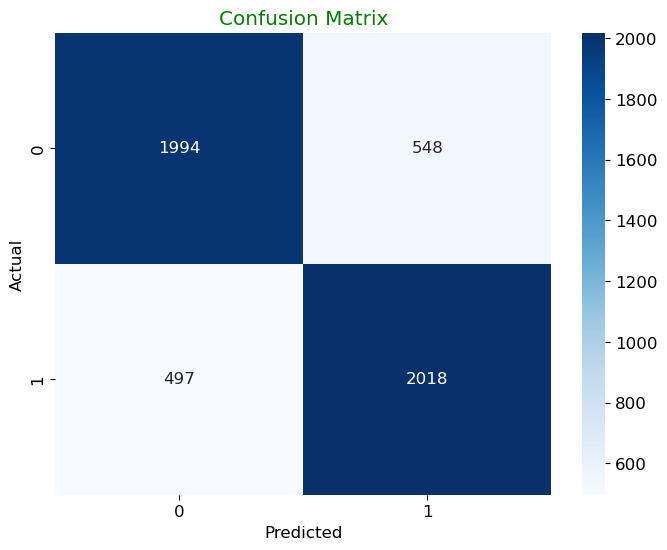

In [96]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Assuming you've already trained a model and made predictions as mentioned before.

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["0", "1"], yticklabels=["0", "1"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


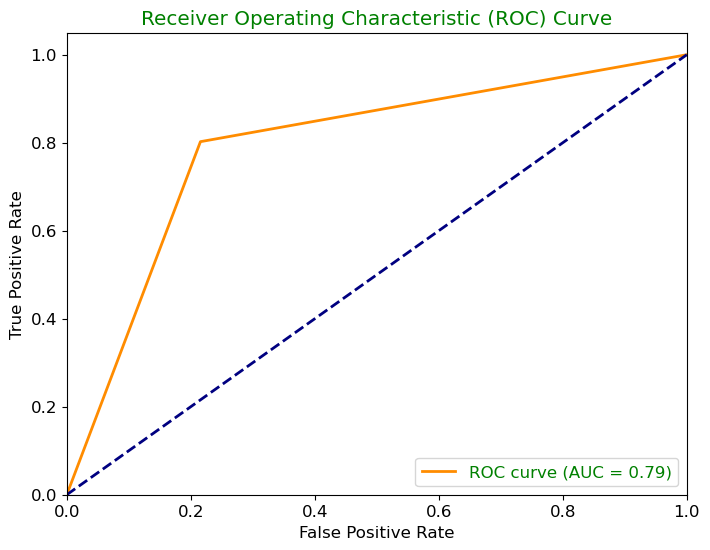

In [97]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming you have already trained your model and made predictions (y_pred) as mentioned before.

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


## Decision Tree Model

In [98]:
 from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report
import matplotlib.pyplot as plt


# Instantiate the Decision Tree classifier
decision_tree = DecisionTreeClassifier(random_state=42)

# Train the Decision Tree model on the training data
decision_tree.fit(X_train, y_train)

# Make predictions on the test data
y_pred = decision_tree.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate a classification report
classification_report_str = classification_report(y_test, y_pred)

# Print accuracy and classification report
print(f"Decision Tree Accuracy: {accuracy}")
print("Decision Tree Classification Report:\n", classification_report_str)

# Optional: Visualize the Decision Tree (requires Graphviz)
# from sklearn.tree import plot_tree
# plt.figure(figsize=(10, 6))
# plot_tree(decision_tree, filled=True, feature_names=X.columns, class_names=["0", "1"])
# plt.show()


Decision Tree Accuracy: 0.9533320150286732
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.96      0.95      0.95      2542
           1       0.95      0.96      0.95      2515

    accuracy                           0.95      5057
   macro avg       0.95      0.95      0.95      5057
weighted avg       0.95      0.95      0.95      5057



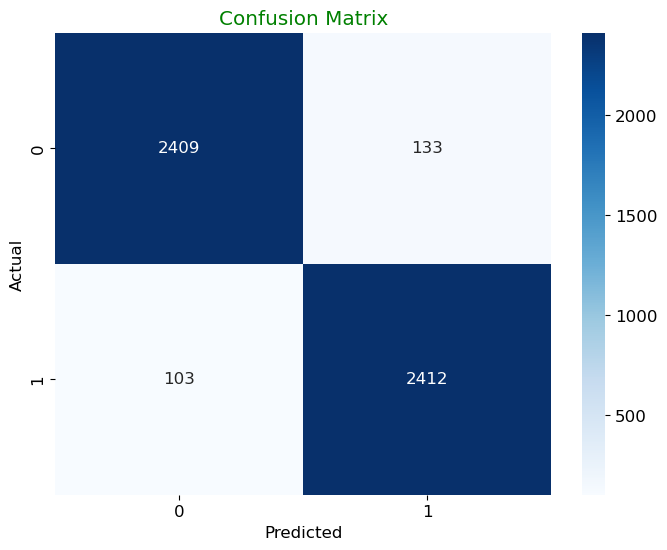

In [99]:
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["0", "1"], yticklabels=["0", "1"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


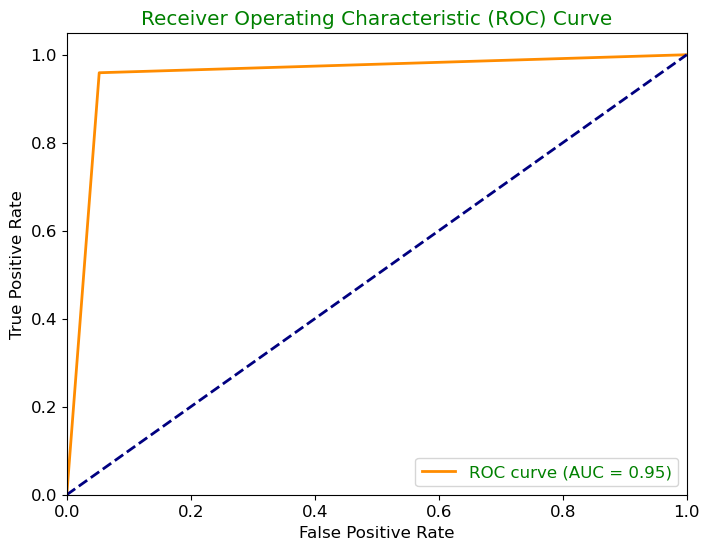

In [100]:

# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


## Random Forest Model

In [101]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have your preprocessed data and have split it into X_train, X_test, y_train, and y_test as previously done.

# Instantiate the Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=50, random_state=42)

# Train the Random Forest model on the training data
random_forest.fit(X_train, y_train)

# Make predictions on the test data
y_pred = random_forest.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate a classification report
classification_report_str = classification_report(y_test, y_pred)

# Print accuracy and classification report
print(f"Random Forest Accuracy: {accuracy}")
print("Random Forest Classification Report:\n", classification_report_str)


Random Forest Accuracy: 0.9881352580581373
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      2542
           1       0.98      0.99      0.99      2515

    accuracy                           0.99      5057
   macro avg       0.99      0.99      0.99      5057
weighted avg       0.99      0.99      0.99      5057



In [105]:
# Variable Ranking
feature_importances = random_forest.feature_importances_

# Assuming your features are in a specific order, you can create a list of feature names
feature_names = ['Tenure','City_Tier','CC_Contacted_LY','Payment','Gender','Service_Score','Account_user_count','account_segment','CC_Agent_Score','Marital_Status','rev_per_month','Complain_ly','rev_growth_yoy','coupon_used_for_payment','Day_Since_CC_connect','cashback','Login_device']  # Replace with your actual feature names

# Create a dictionary with feature names and their importances
feature_importance_dict = dict(zip(feature_names, feature_importances))

# Sort the features based on their importance in descending order
sorted_feature_importance = sorted(feature_importance_dict.items(), key=lambda x: x[1], reverse=True)

# Print accuracy and classification report
print(f"Random Forest Accuracy: {accuracy}")
print("Random Forest Classification Report:\n", classification_report_str)

# Print Variable Rankings
print("\nVariable Rankings:")
for feature, importance in sorted_feature_importance:
    print(f"{feature}: {importance}")


Random Forest Accuracy: 0.9881352580581373
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      2542
           1       0.98      0.99      0.99      2515

    accuracy                           0.99      5057
   macro avg       0.99      0.99      0.99      5057
weighted avg       0.99      0.99      0.99      5057


Variable Rankings:
City_Tier: 0.2473805430810406
Complain_ly: 0.05984135245935777
CC_Agent_Score: 0.05256403676140699
rev_growth_yoy: 0.05205706335741432
coupon_used_for_payment: 0.04939326384215488
Account_user_count: 0.04869068109767912
account_segment: 0.04692171492982635
Marital_Status: 0.04631384811571193
Payment: 0.04533534476975617
Service_Score: 0.045060937385811815
rev_per_month: 0.03277592761343626
Gender: 0.027421834091873425
Tenure: 0.02515927284307251
CC_Contacted_LY: 0.02079583241071164
Day_Since_CC_connect: 0.011757028634439608
cashback: 0.011256714122579885
Login_devic

In [107]:
from sklearn.feature_selection import SelectFromModel

# Set the number of top features you want to select
k = 5  # You can adjust this value based on your analysis

# Create a selector object that will use the top k features
selector = SelectFromModel(random_forest, threshold=-np.inf, max_features=k)

# Fit the selector to the data
selector.fit(X_train, y_train)

# Transform the data to include only the selected features
X_train_selected = selector.transform(X_train)
X_test_selected = selector.transform(X_test)

# Now, you can train your model on the selected features and evaluate its performance
random_forest_selected = RandomForestClassifier(n_estimators=50, random_state=42)
random_forest_selected.fit(X_train_selected, y_train)

# Make predictions on the test data
y_pred_selected = random_forest_selected.predict(X_test_selected)

# Calculate accuracy on the selected features
accuracy_selected = accuracy_score(y_test, y_pred_selected)

# Print the accuracy on the selected features
print(f"Random Forest Accuracy on Selected Features: {accuracy_selected}")

Random Forest Accuracy on Selected Features: 0.9331619537275064


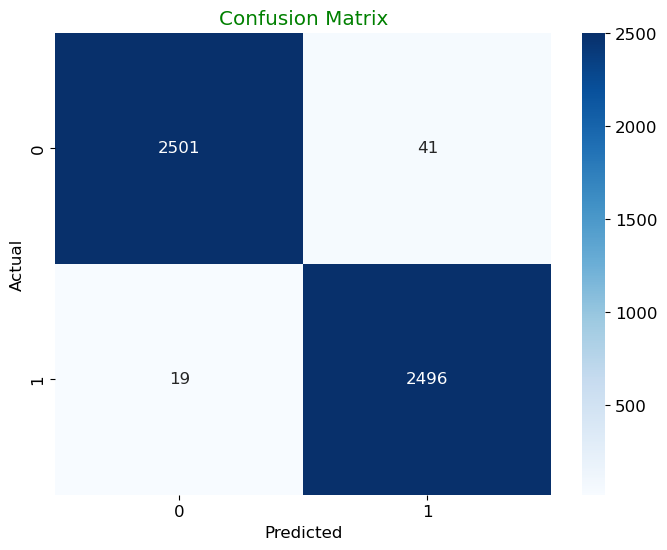

In [102]:

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["0", "1"], yticklabels=["0", "1"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


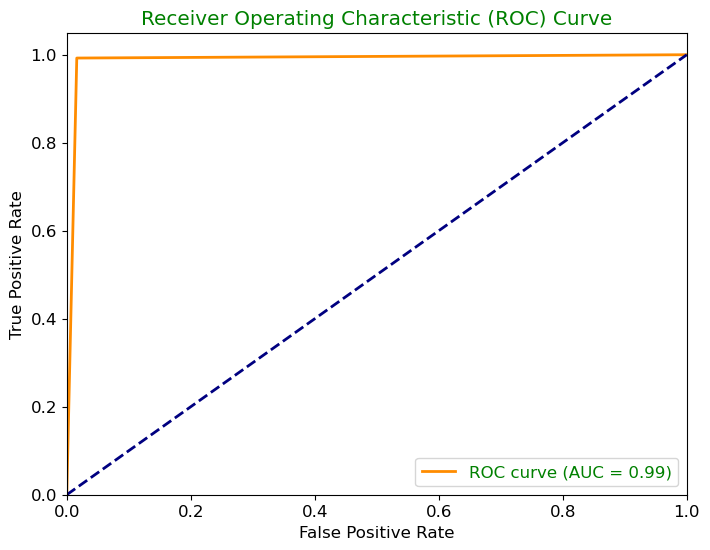

In [191]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


## Gradient Boosting Model

In [120]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have your preprocessed data and have split it into X_train, X_test, y_train, and y_test as previously done.

# Instantiate the Gradient Boosting classifier
gradient_boosting = GradientBoostingClassifier(n_estimators=100, random_state=42)

# Train the Gradient Boosting model on the training data
gradient_boosting.fit(X_train, y_train)

# Make predictions on the test data
y_pred = gradient_boosting.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate a classification report
classification_report_str = classification_report(y_test, y_pred)

# Print accuracy and classification report
print(f"Gradient Boosting Accuracy: {accuracy}")
print("Gradient Boosting Classification Report:\n", classification_report_str)


Gradient Boosting Accuracy: 0.9179355349021159
Gradient Boosting Classification Report:
               precision    recall  f1-score   support

           0       0.91      0.93      0.92      2542
           1       0.93      0.90      0.92      2515

    accuracy                           0.92      5057
   macro avg       0.92      0.92      0.92      5057
weighted avg       0.92      0.92      0.92      5057



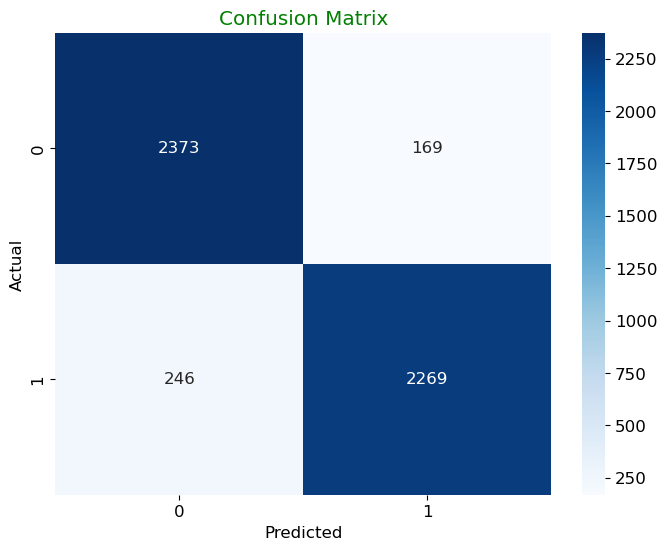

In [121]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["0", "1"], yticklabels=["0", "1"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


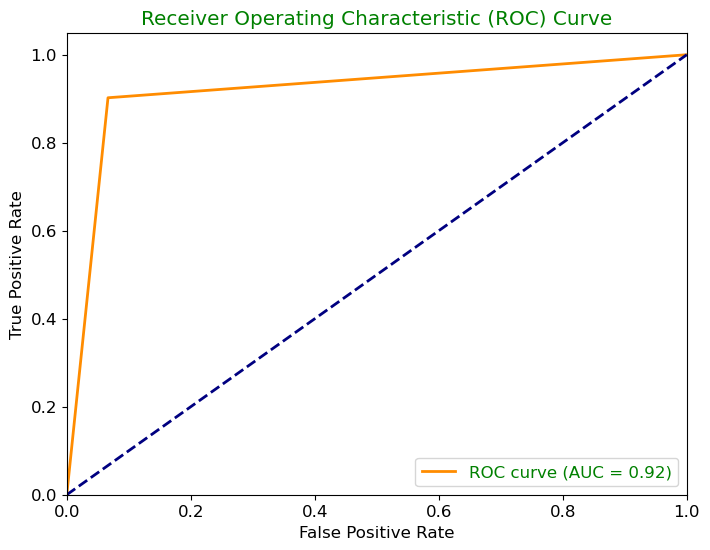

In [122]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


## Ada Boost Model

In [123]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have your preprocessed data and have split it into X_train, X_test, y_train, and y_test as previously done.

# Instantiate the AdaBoost classifier
adaboost = AdaBoostClassifier(n_estimators=50, random_state=42)

# Train the AdaBoost model on the training data
adaboost.fit(X_train, y_train)

# Make predictions on the test data
y_pred = adaboost.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate a classification report
classification_report_str = classification_report(y_test, y_pred)

# Print accuracy and classification report
print(f"AdaBoost Accuracy: {accuracy}")
print("AdaBoost Classification Report:\n", classification_report_str)


AdaBoost Accuracy: 0.8694878386395096
AdaBoost Classification Report:
               precision    recall  f1-score   support

           0       0.86      0.89      0.87      2542
           1       0.88      0.85      0.87      2515

    accuracy                           0.87      5057
   macro avg       0.87      0.87      0.87      5057
weighted avg       0.87      0.87      0.87      5057



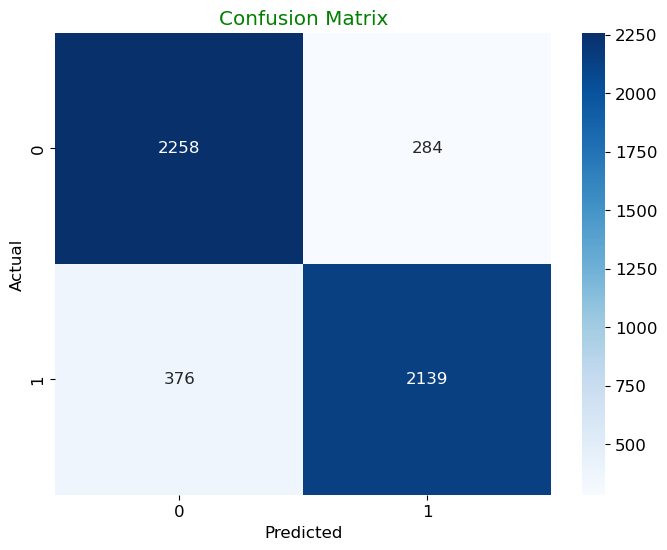

In [124]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["0", "1"], yticklabels=["0", "1"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


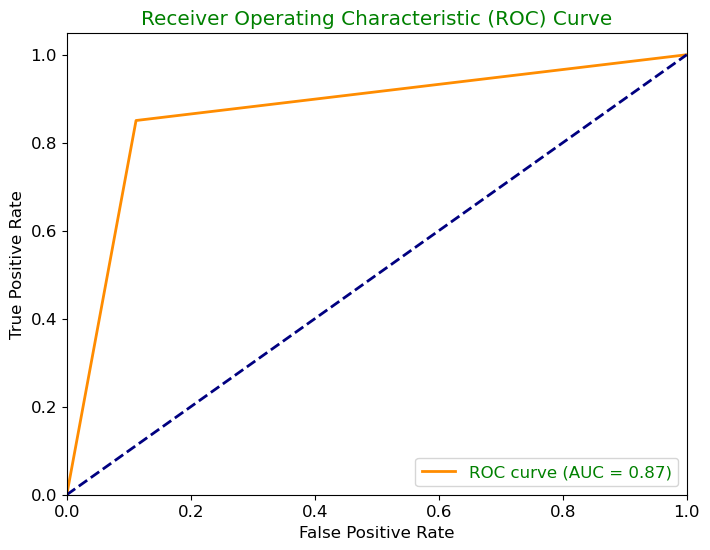

In [125]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## LDA Model

In [128]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split

# Assuming you have your preprocessed data, including feature matrix (X) and target labels (Y).

# Split the data into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Instantiate the LDA classifier
lda = LinearDiscriminantAnalysis()

# Train the LDA model on the training data
lda.fit(X_train, Y_train)

# Make predictions on the test data
Y_pred = lda.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred)

# Generate a classification report
classification_report_str = classification_report(Y_test, Y_pred)

# Print accuracy and classification report
print(f"LDA Accuracy: {accuracy}")
print("LDA Classification Report:\n", classification_report_str)


LDA Accuracy: 0.8880994671403197
LDA Classification Report:
               precision    recall  f1-score   support

           0       0.90      0.97      0.93      1856
           1       0.77      0.51      0.62       396

    accuracy                           0.89      2252
   macro avg       0.84      0.74      0.78      2252
weighted avg       0.88      0.89      0.88      2252



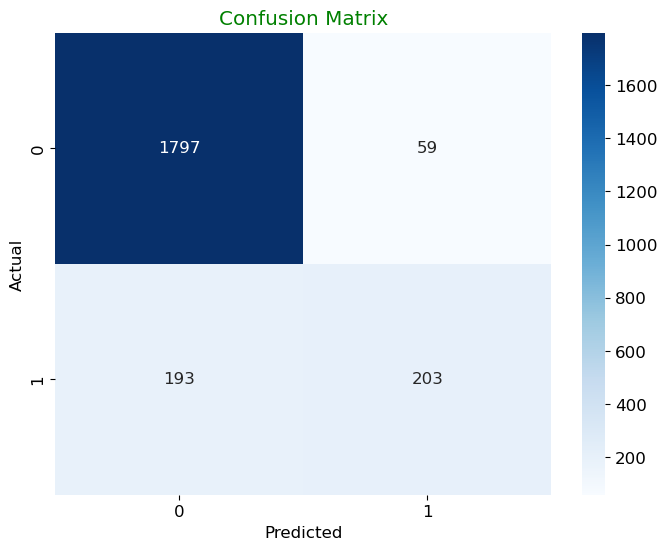

In [129]:
# Calculate the confusion matrix
cm = confusion_matrix(Y_test, Y_pred)

# Create a heatmap of the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["0", "1"], yticklabels=["0", "1"])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

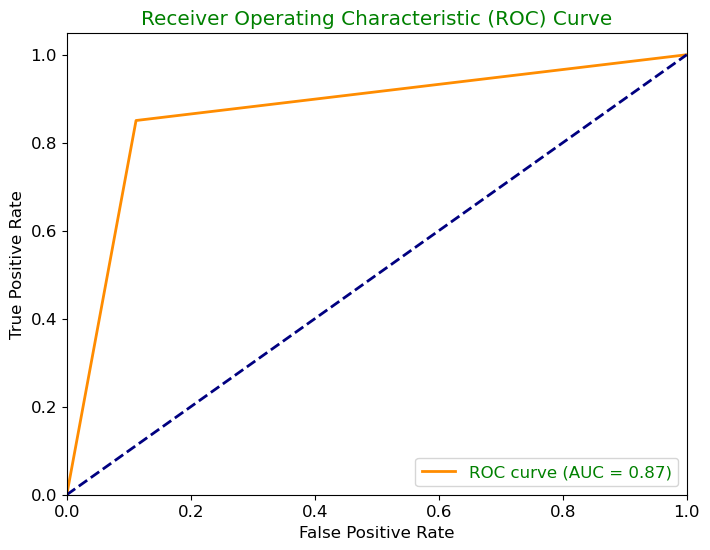

In [132]:
# Calculate the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate the area under the ROC curve (AUC)
roc_auc = auc(fpr, tpr)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Model Tunning

## Logistic regression Model Tunning

In [169]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

# Assuming you've already applied SMOTE to X_resampled and Y_resampled as mentioned before.

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, Y_resampled, test_size=0.27, random_state=42)

# Instantiate the logistic regression model
logistic_model = LogisticRegression()

# Train the model on the training data
logistic_model.fit(X_train, y_train)

# Make predictions on the test data
y_pred = logistic_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report_str)

Accuracy: 0.7933557445125569
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.78      0.79      2542
           1       0.79      0.80      0.79      2515

    accuracy                           0.79      5057
   macro avg       0.79      0.79      0.79      5057
weighted avg       0.79      0.79      0.79      5057



In [170]:
from sklearn.model_selection import GridSearchCV

# Define the hyperparameter grid
param_grid = {
    'C': [0.01, 0.1, 1, 10],
    'penalty': ['l1', 'l2']
}

# Create a GridSearchCV object
grid_search = GridSearchCV(logistic_model, param_grid, cv=5)

# Train the model on the training data
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test data
y_pred = best_model.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
classification_report_str = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print("Classification Report:\n", classification_report_str)

Accuracy: 0.7933557445125569
Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.78      0.79      2542
           1       0.79      0.80      0.79      2515

    accuracy                           0.79      5057
   macro avg       0.79      0.79      0.79      5057
weighted avg       0.79      0.79      0.79      5057



C:\Users\bhupi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:372: FitFailedWarning: 
20 fits failed out of a total of 40.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
20 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\bhupi\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 680, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\bhupi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 1461, in fit
    solver = _check_solver(self.solver, self.penalty, self.dual)
  File "C:\Users\bhupi\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py", line 447, in _check_solver
    raise ValueError(
Valu

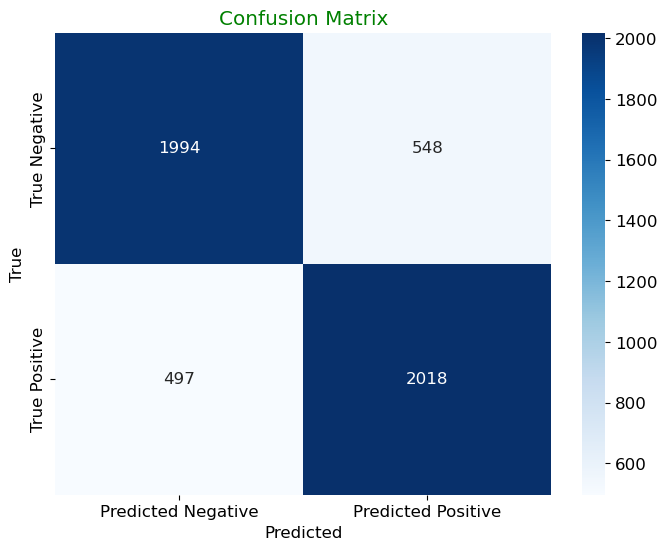

In [171]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate a confusion matrix
confusion_matrix_result = confusion_matrix(y_test, y_pred)

# Create a heatmap from the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_result, annot=True, fmt="d", cmap="Blues", xticklabels=["Predicted Negative", "Predicted Positive"], yticklabels=["True Negative", "True Positive"])
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")

# Save the image
plt.savefig("confusion_matrix.png")
plt.show()

## Descission tree Model Tunning

In [202]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report

# Split the data into 80% training and 20% testing
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Define the hyperparameter grid
param_grid = {
    'max_depth': [5, 10, 15, 20],
    'min_samples_split': [2, 5, 10, 20],
    'splitter': ['best', 'random']
}

# Create a GridSearchCV object for Decision Tree
grid_search = GridSearchCV(DecisionTreeClassifier(), param_grid, cv=5)

# Train the model on the training data
grid_search.fit(X_train, Y_train)

# Get the best model
the_best_model = grid_search.best_estimator_

# Make predictions on the test data
Y_pred = the_best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(Y_test, Y_pred)

# Generate a classification report
classification_report_str = classification_report(Y_test, Y_pred)

# Print accuracy and classification report
print(f"Decision Tree Accuracy: {accuracy}")
print("Decision Tree Classification Report:\n", classification_report_str)


Decision Tree Accuracy: 0.9578152753108348
Decision Tree Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.97      1856
           1       0.86      0.91      0.88       396

    accuracy                           0.96      2252
   macro avg       0.92      0.94      0.93      2252
weighted avg       0.96      0.96      0.96      2252



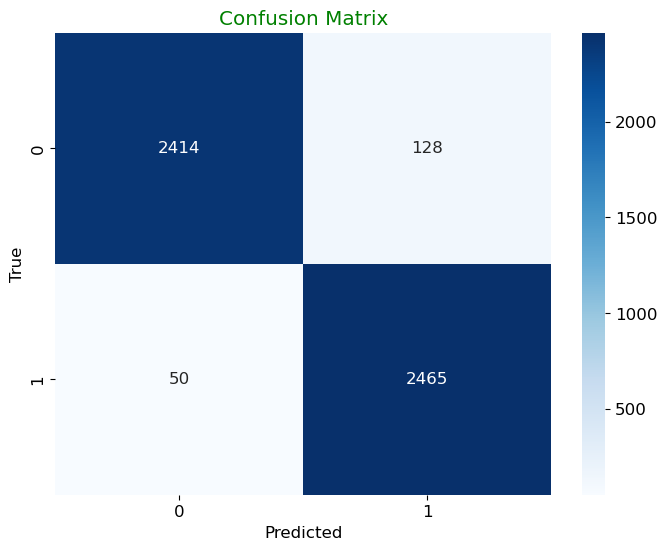

In [173]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate a confusion matrix
confusion_matrix_result = confusion_matrix(y_test, y_pred)

# Create a heatmap from the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_result, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")

# Save the image
plt.savefig("confusion_matrix.png")
plt.show()

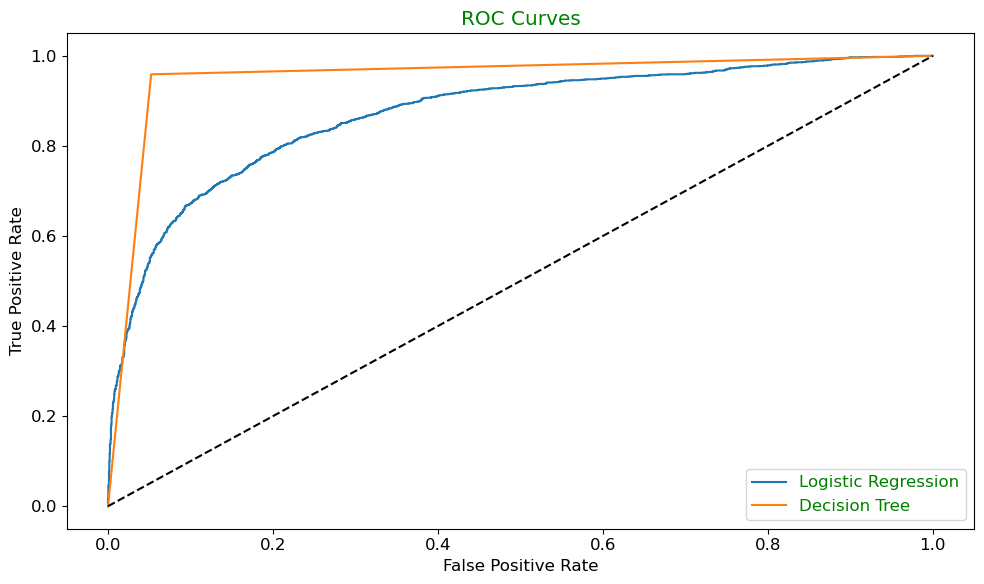

In [174]:
# Plot the ROC curves
plt.figure(figsize=(10, 6))
plt.plot(logistic_regression_fpr, logistic_regression_tpr, label='Logistic Regression')
plt.plot(decision_tree_fpr, decision_tree_tpr, label='Decision Tree')
plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.legend()
plt.title('ROC Curves')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.tight_layout()
plt.show()

## Random Forest Model Tunning

In [175]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Assuming you have your preprocessed data and have split it into X_train, X_test, y_train, and y_test as previously done.

# Instantiate the Random Forest classifier
random_forest = RandomForestClassifier(n_estimators=50, random_state=42)

# Train the Random Forest model on the training data
random_forest.fit(X_train, y_train)

# Make predictions on the test data
y_pred = random_forest.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate a classification report
classification_report_str = classification_report(y_test, y_pred)

# Print accuracy and classification report
print(f"Random Forest Accuracy: {accuracy}")
print("Random Forest Classification Report:\n", classification_report_str)

Random Forest Accuracy: 0.9881352580581373
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      2542
           1       0.98      0.99      0.99      2515

    accuracy                           0.99      5057
   macro avg       0.99      0.99      0.99      5057
weighted avg       0.99      0.99      0.99      5057



In [176]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import GridSearchCV

# Instantiate the Random Forest classifier
random_forest = RandomForestClassifier(random_state=42)

# Define the hyperparameter grid for tuning
param_grid = {
    'n_estimators': [50, 100, 150],  # You can adjust this range
    'max_depth': [None, 10, 20, 30],  # Adjust as needed
    'min_samples_split': [2, 5, 10],  # Tune as needed
    'min_samples_leaf': [1, 2, 4]  # Tune as needed
}

# Create a GridSearchCV object
grid_search = GridSearchCV(random_forest, param_grid, cv=5)

# Train the Random Forest model on the training data
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Make predictions on the test data`
y_pred = best_model.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Generate a classification report
classification_report_str = classification_report(y_test, y_pred)

# Print accuracy and classification report
print(f"Random Forest Accuracy: {accuracy}")
print("Random Forest Classification Report:\n", classification_report_str)

Random Forest Accuracy: 0.9881352580581373
Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.99      2542
           1       0.98      0.99      0.99      2515

    accuracy                           0.99      5057
   macro avg       0.99      0.99      0.99      5057
weighted avg       0.99      0.99      0.99      5057



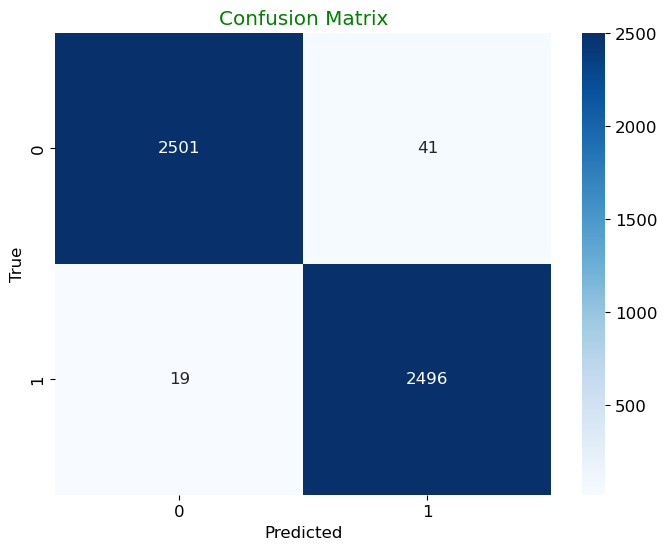

In [177]:
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Generate a confusion matrix
confusion_matrix_result = confusion_matrix(y_test, y_pred)

# Create a heatmap from the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(confusion_matrix_result, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("True")
plt.title("Confusion Matrix")

# Save the image
plt.savefig("confusion_matrix.png")
plt.show()

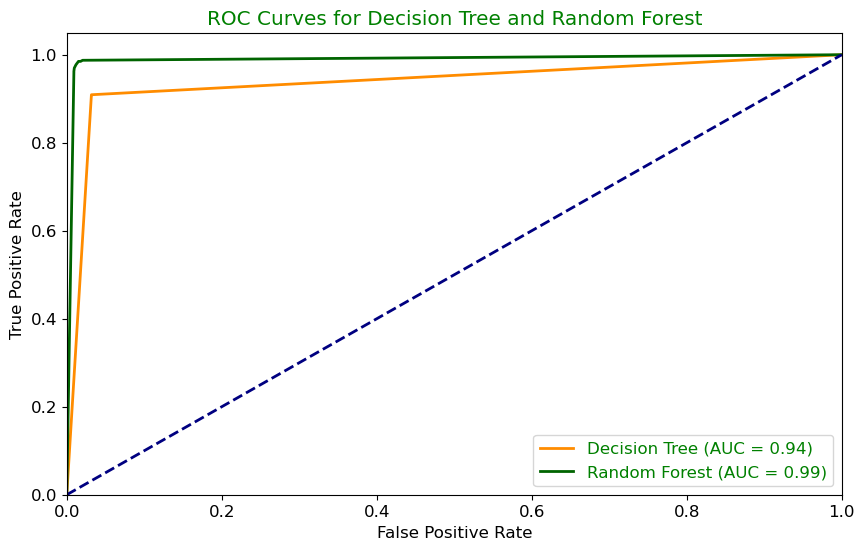

In [211]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Calculate ROC curve for the Decision Tree model
fpr_dt, tpr_dt, _ = roc_curve(Y_test, the_best_model.predict_proba(X_test)[:, 1])
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Calculate ROC curve for the Random Forest model
fpr_rf, tpr_rf, _ = roc_curve(Y_test, best_model.predict_proba(X_test)[:, 1])
roc_auc_rf = auc(fpr_rf, tpr_rf)

# Plot the ROC curves for both models
plt.figure(figsize=(10, 6))
plt.plot(fpr_dt, tpr_dt, color='darkorange', lw=2, label='Decision Tree (AUC = {:.2f})'.format(roc_auc_dt))
plt.plot(fpr_rf, tpr_rf, color='darkgreen', lw=2, label='Random Forest (AUC = {:.2f})'.format(roc_auc_rf))
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves for Decision Tree and Random Forest')
plt.legend(loc='lower right')
plt.show()